In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [236]:
dd = pd.read_csv('./data/Ecommerce_Consumer_Behavior_Analysis_Data.csv')
dd

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,...,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,...,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,...,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20-562-2569,44,Female,High,Divorced,Bachelor's,High,Aramayuan,Mobile Accessories,$463.67,...,4,NaN,Tablet,PayPal,7/7/2024,True,False,Need-based,Standard,5
996,41-366-4205,50,Female,High,Single,High School,Middle,Paquera,Gardening & Outdoors,$69.78,...,6,Low,Tablet,Cash,3/28/2024,True,False,Wants-based,No Preference,9
997,77-241-7621,26,Male,High,Married,Bachelor's,High,Warudoyong,Food & Beverages,$453.37,...,6,High,Desktop,Credit Card,3/11/2024,True,True,Wants-based,Express,9
998,53-091-2176,21,Female,High,Widowed,Bachelor's,Middle,Béziers,Baby Products,$106.15,...,5,Medium,Desktop,Cash,3/30/2024,True,True,Impulsive,Standard,8


In [194]:
import matplotlib.font_manager as fm
import matplotlib

font_path = '/System/Library/Fonts/Supplemental/Arial Unicode.ttf'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font)


In [235]:
# 📌 1. CSV 파일 로드
df = pd.read_csv('./data/Ecommerce_Consumer_Behavior_Analysis_Data.csv')
lst = ['Purchase_Amount','Age', 'Gender', 'Income_Level', 'Marital_Status', 'Education_Level', 'Occupation', 'Purchase_Channel', 'Time_to_Decision']
custom_df = df.loc[:, lst]
custom_df

,Purchase_Amount,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Purchase_Channel,Time_to_Decision
0,$333.80,22,Female,Middle,Married,Bachelor's,Middle,Mixed,2
1,$222.22,49,Male,High,Married,High School,High,In-Store,6
2,$426.22,24,Female,Middle,Single,Master's,High,Mixed,3
3,$101.31,29,Female,Middle,Single,Master's,Middle,Mixed,10
4,$211.70,33,Female,Middle,Widowed,High School,Middle,Mixed,4
...,...,...,...,...,...,...,...,...,...
995,$463.67,44,Female,High,Divorced,Bachelor's,High,Online,5
996,$69.78,50,Female,High,Single,High School,Middle,Mixed,9
997,$453.37,26,Male,High,Married,Bachelor's,High,Mixed,9
998,$106.15,21,Female,High,Widowed,Bachelor's,Middle,In-Store,8


In [237]:
custom_df.describe()

,Age,Time_to_Decision
count,1000.000000,1000.000000
mean,34.304000,7.547000
std,9.353238,4.035849
min,18.000000,1.000000
25%,26.000000,4.000000
50%,34.500000,8.000000
75%,42.000000,11.000000
max,50.000000,14.000000


In [196]:
custom_df['Gender'].value_counts()

Gender
Female         452
Male           449
Bigender        20
Agender         19
Genderfluid     17
Non-binary      16
Polygender      15
Genderqueer     12
Name: count, dtype: int64

In [197]:
custom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Purchase_Amount   1000 non-null   object
 1   Age               1000 non-null   int64 
 2   Gender            1000 non-null   object
 3   Income_Level      1000 non-null   object
 4   Marital_Status    1000 non-null   object
 5   Education_Level   1000 non-null   object
 6   Occupation        1000 non-null   object
 7   Purchase_Channel  1000 non-null   object
 8   Time_to_Decision  1000 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 70.4+ KB


In [198]:
gender_filtered_df = custom_df[custom_df['Gender'].isin(['Female', 'Male'])]
gender_filtered_df

,Purchase_Amount,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Purchase_Channel,Time_to_Decision
0,$333.80,22,Female,Middle,Married,Bachelor's,Middle,Mixed,2
1,$222.22,49,Male,High,Married,High School,High,In-Store,6
2,$426.22,24,Female,Middle,Single,Master's,High,Mixed,3
3,$101.31,29,Female,Middle,Single,Master's,Middle,Mixed,10
4,$211.70,33,Female,Middle,Widowed,High School,Middle,Mixed,4
...,...,...,...,...,...,...,...,...,...
995,$463.67,44,Female,High,Divorced,Bachelor's,High,Online,5
996,$69.78,50,Female,High,Single,High School,Middle,Mixed,9
997,$453.37,26,Male,High,Married,Bachelor's,High,Mixed,9
998,$106.15,21,Female,High,Widowed,Bachelor's,Middle,In-Store,8


In [199]:
gender_filtered_df['Gender'].value_counts()

Gender
Female    452
Male      449
Name: count, dtype: int64

In [200]:
gender_filtered_df.to_csv('./data/Ecommerce_Comsumer_Behavior_custom_data.csv', index=False)

In [201]:
# Age 컬럼을 숫자형으로 변환 (문자열일 경우 대비)
gender_filtered_df["Age"] = pd.to_numeric(gender_filtered_df["Age"], errors='coerce')

# 나이대별 그룹화 함수 정의
def age_group(age):
    if age < 20:
        return "10대 미만"
    elif age < 30:
        return "20대"
    elif age < 40:
        return "30대"
    elif age < 50:
        return "40대"
    elif age < 60:
        return "50대"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
    else:
        return "60대 이상"

# 새로운 Age_Group 컬럼 생성
gender_filtered_df["Age_Group"] = gender_filtered_df["Age"].apply(age_group)

# 기존 Age 컬럼 삭제
gender_filtered_df = gender_filtered_df.drop(columns=["Age"])

# 변경된 데이터 확인
print(gender_filtered_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 901 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Purchase_Amount   901 non-null    object
 1   Gender            901 non-null    object
 2   Income_Level      901 non-null    object
 3   Marital_Status    901 non-null    object
 4   Education_Level   901 non-null    object
 5   Occupation        901 non-null    object
 6   Purchase_Channel  901 non-null    object
 7   Time_to_Decision  901 non-null    int64 
 8   Age_Group         901 non-null    object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB
None


In [202]:
gender_filtered_df['Age_Group'].value_counts()

Age_Group
20대       279
40대       277
30대       270
10대 미만     45
50대        30
Name: count, dtype: int64

In [203]:
# 변환할 컬럼 선택 (Purchase_Channel, Time_to_Decision 제외)
categorical_columns = gender_filtered_df.columns.difference(['Purchase_Channel', 'Time_to_Decision'])

# 각 컬럼을 범주형 데이터로 변환
gender_filtered_df[categorical_columns] = gender_filtered_df[categorical_columns].astype('category')

print(gender_filtered_df)

custom_df = gender_filtered_df

    Purchase_Amount  Gender Income_Level Marital_Status Education_Level  \
0          $333.80   Female       Middle        Married      Bachelor's   
1          $222.22     Male         High        Married     High School   
2          $426.22   Female       Middle         Single        Master's   
3          $101.31   Female       Middle         Single        Master's   
4          $211.70   Female       Middle        Widowed     High School   
..              ...     ...          ...            ...             ...   
995        $463.67   Female         High       Divorced      Bachelor's   
996         $69.78   Female         High         Single     High School   
997        $453.37     Male         High        Married      Bachelor's   
998        $106.15   Female         High        Widowed      Bachelor's   
999        $378.47   Female       Middle         Single     High School   

    Occupation Purchase_Channel  Time_to_Decision Age_Group  
0       Middle            Mixed      

In [204]:
# Purchase_Amount에서 앞에 붙은 '$' 제거 후 숫자로 변환
custom_df["Purchase_Amount"] = custom_df["Purchase_Amount"].astype(str).str.replace("$", "", regex=False)
custom_df["Purchase_Amount"] = pd.to_numeric(custom_df["Purchase_Amount"], errors='coerce')

# 변환된 데이터 확인
print(custom_df[["Purchase_Amount"]].head())

   Purchase_Amount
0           333.80
1           222.22
2           426.22
3           101.31
4           211.70


In [205]:
custom_df

,Purchase_Amount,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Purchase_Channel,Time_to_Decision,Age_Group
0,333.80,Female,Middle,Married,Bachelor's,Middle,Mixed,2,20대
1,222.22,Male,High,Married,High School,High,In-Store,6,40대
2,426.22,Female,Middle,Single,Master's,High,Mixed,3,20대
3,101.31,Female,Middle,Single,Master's,Middle,Mixed,10,20대
4,211.70,Female,Middle,Widowed,High School,Middle,Mixed,4,30대
...,...,...,...,...,...,...,...,...,...
995,463.67,Female,High,Divorced,Bachelor's,High,Online,5,40대
996,69.78,Female,High,Single,High School,Middle,Mixed,9,50대
997,453.37,Male,High,Married,Bachelor's,High,Mixed,9,20대
998,106.15,Female,High,Widowed,Bachelor's,Middle,In-Store,8,20대


In [206]:
custom_df['Purchase_Amount'].value_counts()

Purchase_Amount
197.90    2
253.37    2
365.88    2
378.87    2
178.04    2
         ..
113.01    1
419.13    1
183.86    1
427.82    1
378.47    1
Name: count, Length: 890, dtype: int64

In [207]:
custom_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 901 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Purchase_Amount   901 non-null    float64 
 1   Gender            901 non-null    category
 2   Income_Level      901 non-null    category
 3   Marital_Status    901 non-null    category
 4   Education_Level   901 non-null    category
 5   Occupation        901 non-null    category
 6   Purchase_Channel  901 non-null    object  
 7   Time_to_Decision  901 non-null    int64   
 8   Age_Group         901 non-null    category
dtypes: category(6), float64(1), int64(1), object(1)
memory usage: 34.3+ KB


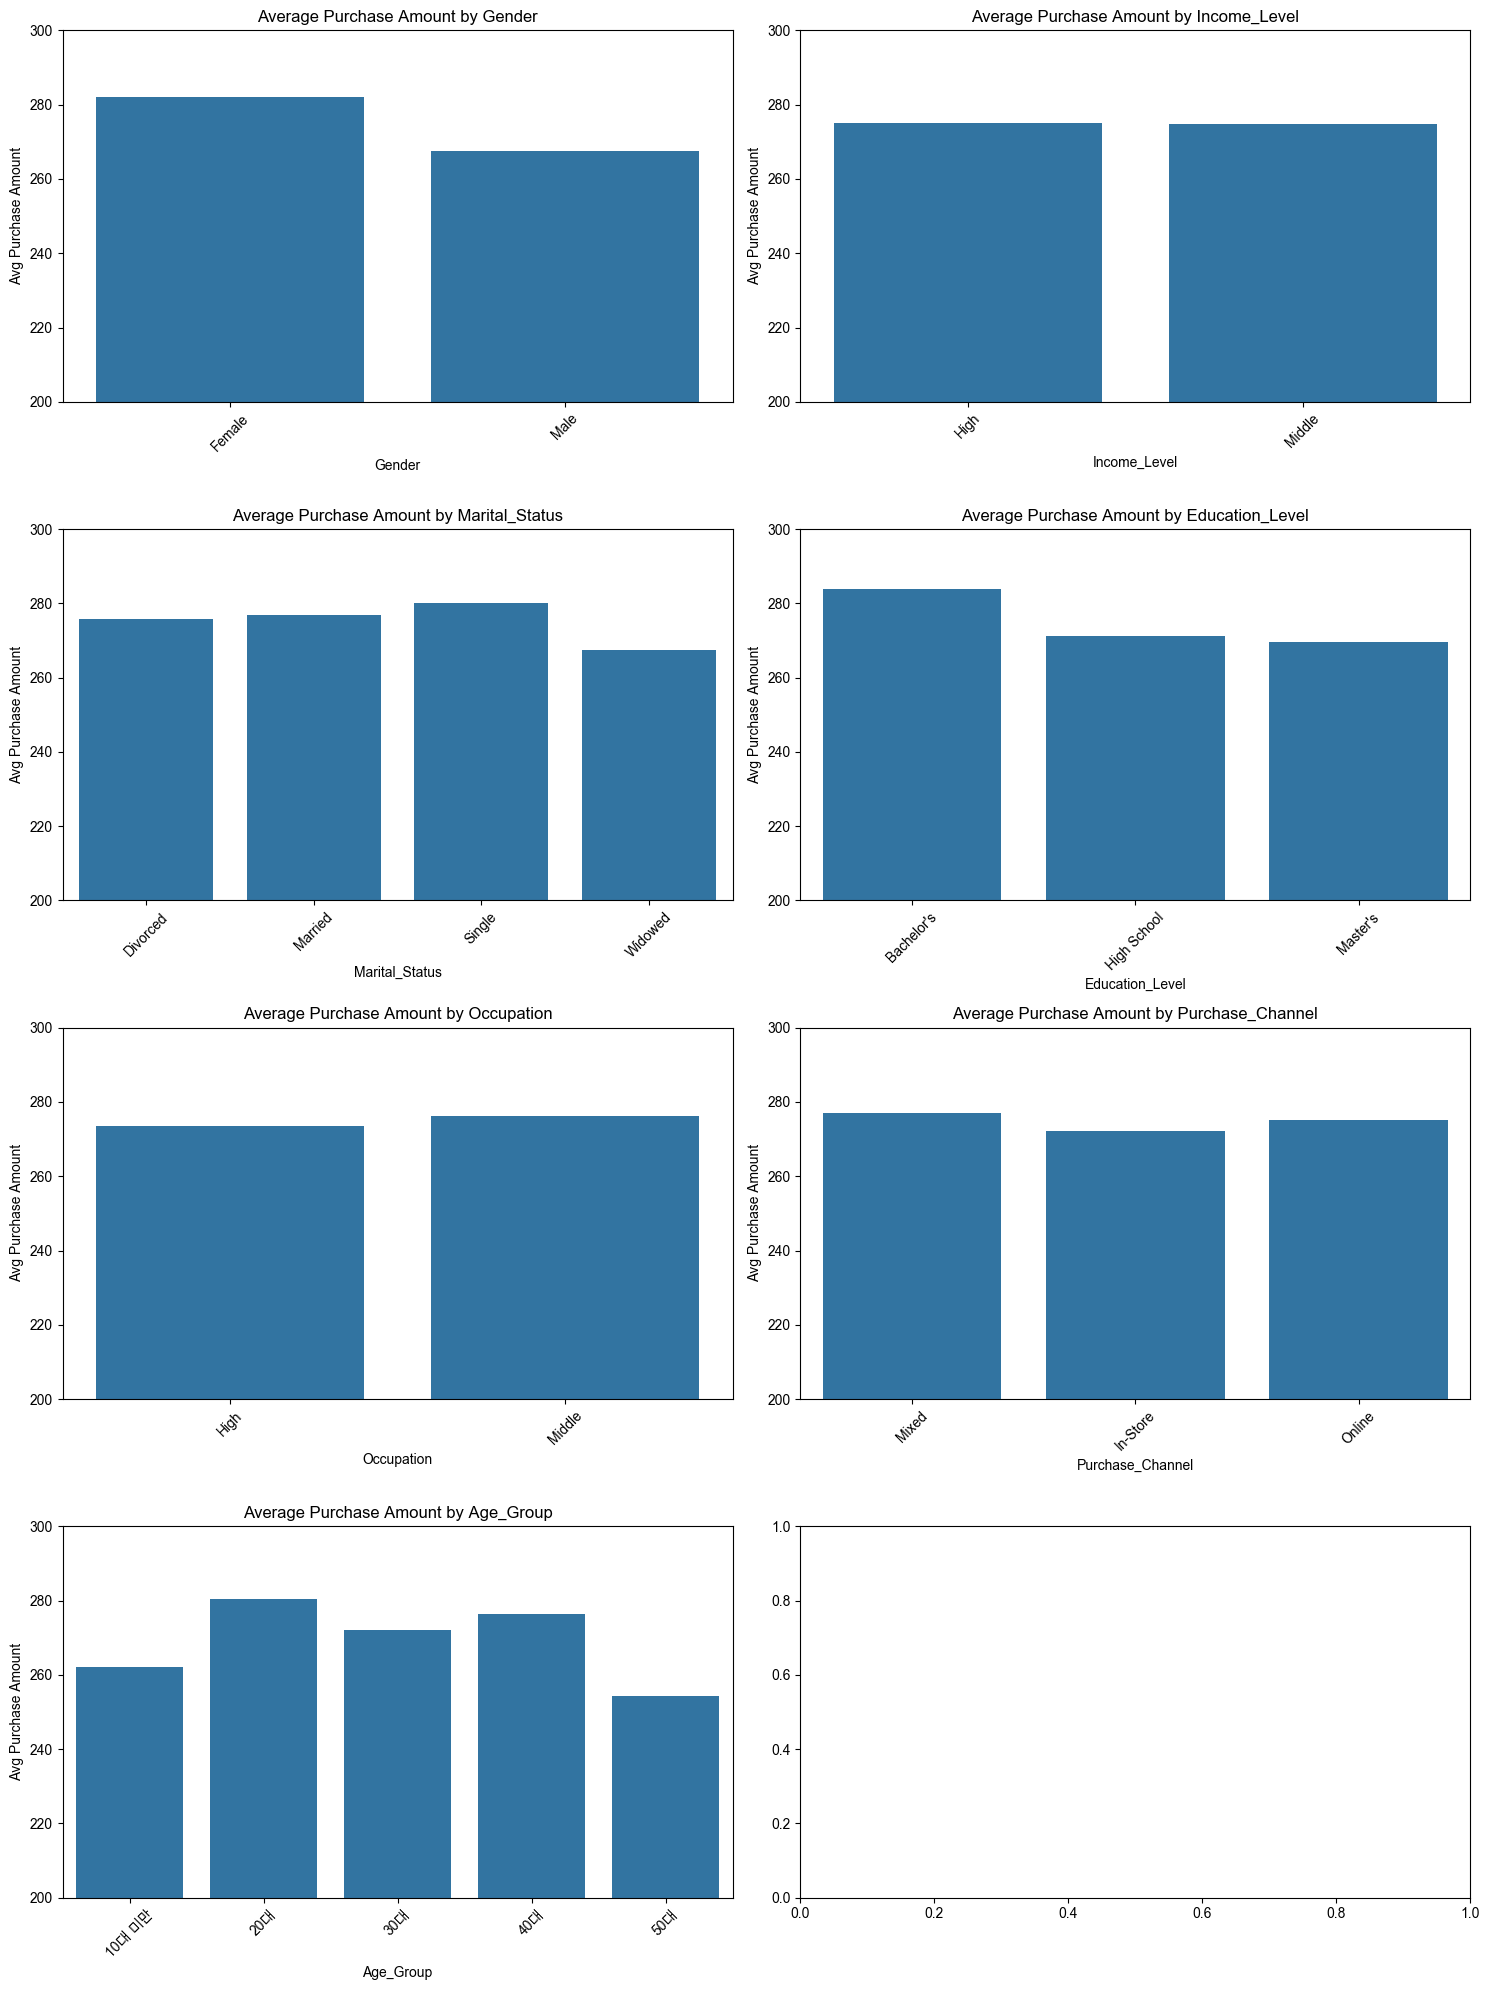

In [208]:
# 서브플롯을 사용하여 하나의 플롯에 여러 그래프 출력
fig, axes = plt.subplots(4, 2, figsize=(15, 20))  # 2x2 서브플롯 생성
columns_to_plot = ['Gender',	'Income_Level',	'Marital_Status'	,'Education_Level',	'Occupation',	'Purchase_Channel','Age_Group']

# 서브플롯에 각 그래프 추가
for ax, col in zip(axes.flat, columns_to_plot):
    sns.barplot(x=custom_df[col], y=custom_df["Purchase_Amount"], ci=None, ax=ax)
    ax.set_title(f"Average Purchase Amount by {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Avg Purchase Amount")
    ax.set_ylim(200, 300)
    ax.tick_params(axis='x', rotation=45)  # x축 레이블 가독성 향상

# 레이아웃 조정
plt.tight_layout()
plt.show()


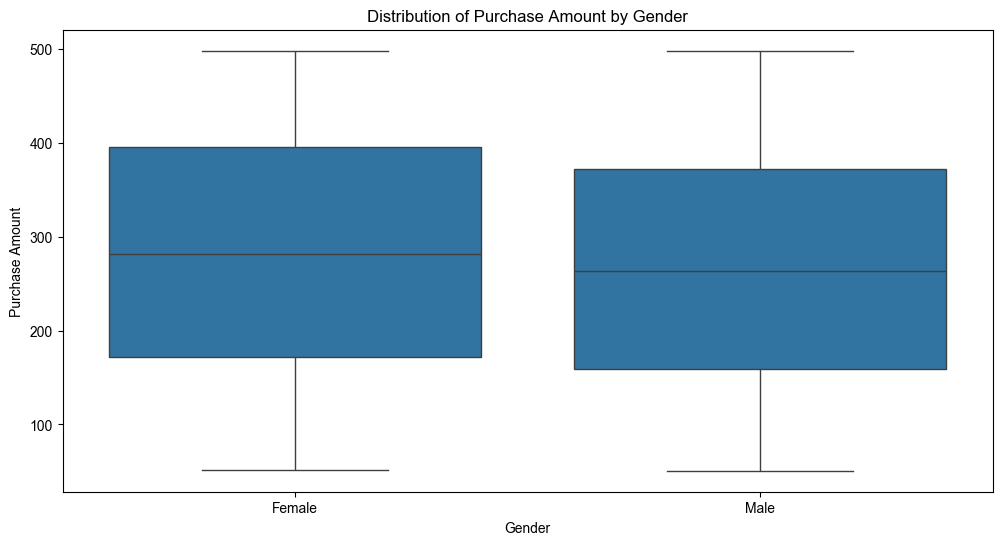

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 박스플롯 - 성별에 따른 구매금액 분포
sns.boxplot(x=custom_df["Gender"], y=custom_df["Purchase_Amount"])

# 그래프 제목 및 라벨 설정
plt.title("Distribution of Purchase Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Purchase Amount")
# plt.ylim(0, custom_df["Purchase_Amount"].quantile(0.99))  # 극단 이상치 제외

# 그래프 표시
plt.show()


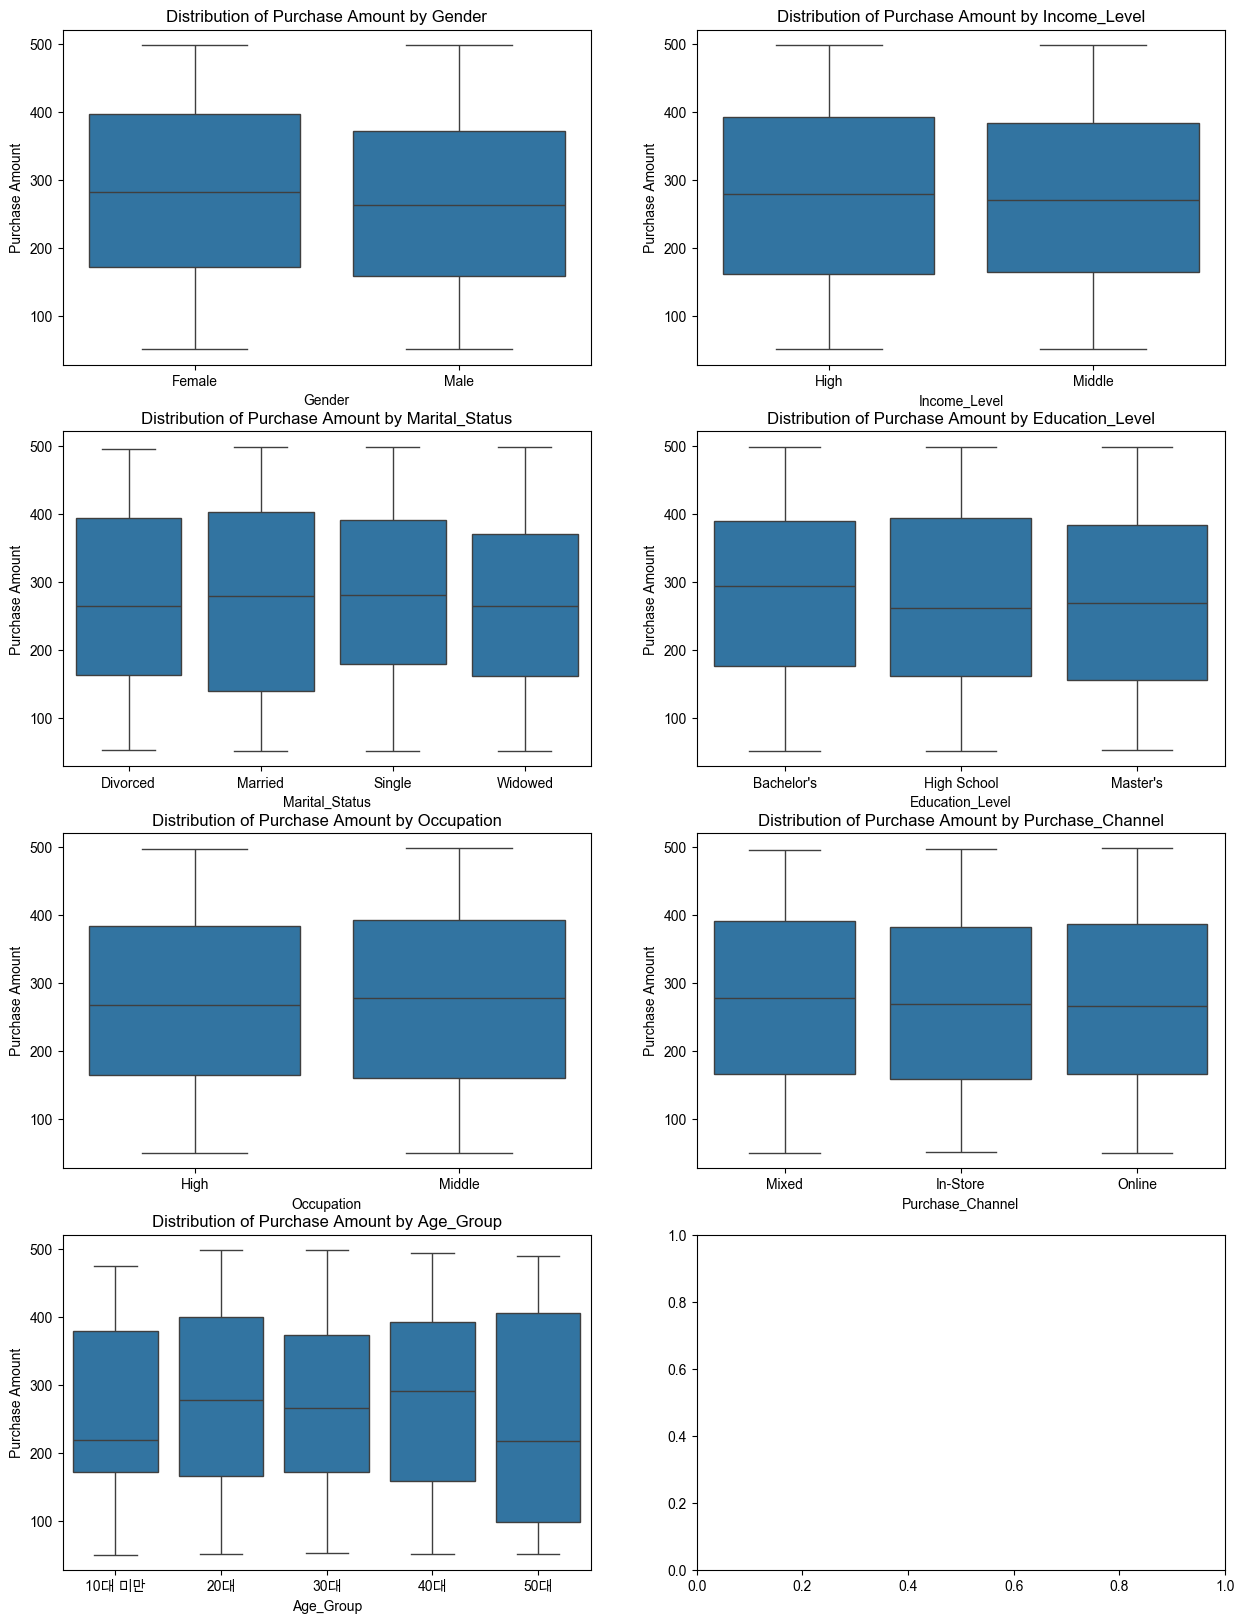

In [210]:
# 서브플롯을 사용하여 하나의 플롯에 여러 그래프 출력
fig, axes = plt.subplots(4, 2, figsize=(15, 20))  # 2x2 서브플롯 생성
columns_to_plot = ['Gender',	'Income_Level',	'Marital_Status'	,'Education_Level',	'Occupation',	'Purchase_Channel','Age_Group']

# 서브플롯에 각 그래프 추가
for ax, col in zip(axes.flat, columns_to_plot):
    # sns.barplot(x=custom_df[col], y=custom_df["Purchase_Amount"], ci=None, ax=ax)
    # ax.set_title(f"Average Purchase Amount by {col}")
    # ax.set_xlabel(col)
    # ax.set_ylabel("Avg Purchase Amount")
    # ax.tick_params(axis='x', rotation=45)  # x축 레이블 가독성 향상

    sns.boxplot(x=custom_df[col], y=custom_df["Purchase_Amount"], ax=ax)

    # 그래프 제목 및 라벨 설정
    ax.set_title(f"Distribution of Purchase Amount by {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Purchase Amount")
    # plt.ylim(0, custom_df["Purchase_Amount"].quantile(0.99))  # 극단 이상치 제외

# 레이아웃 조정
# plt.tight_layout()
plt.show()


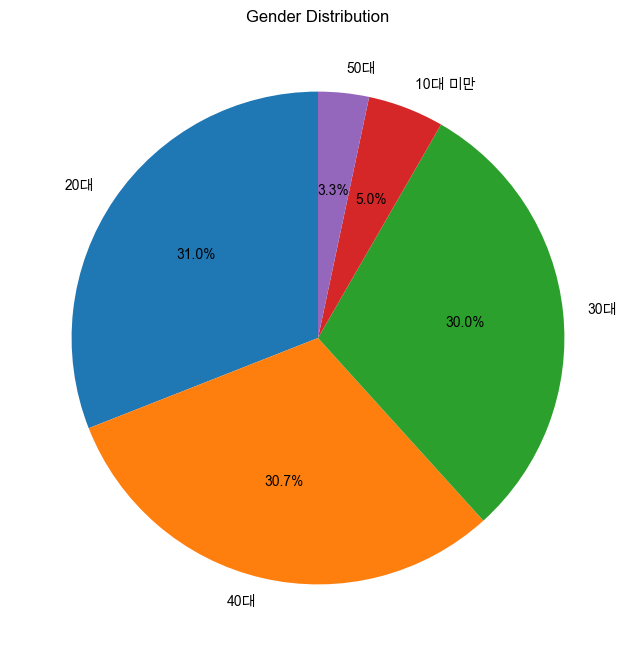

In [211]:
# Gender 컬럼의 비율을 계산
columns_to_plot = ['Gender',	'Income_Level',	'Marital_Status'	,'Education_Level',	'Occupation',	'Purchase_Channel','Age_Group']
gender_counts = custom_df["Age_Group"].value_counts()

#Education_Level
#Purchase_Channel
#Age_Group

# 파이 차트 생성
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90,)

# 제목 설정
plt.title("Gender Distribution")

# 그래프 표시
plt.show()

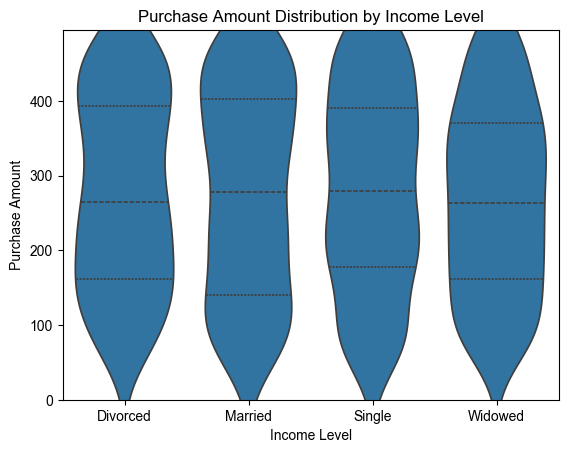

In [212]:
# 바이올린 플롯 - 소득 수준에 따른 구매금액 분포
sns.violinplot(x=custom_df["Marital_Status"], y=custom_df["Purchase_Amount"], inner="quartile")

plt.title("Purchase Amount Distribution by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Purchase Amount")
plt.ylim(0, custom_df["Purchase_Amount"].quantile(0.99))  # 극단 이상치 제외

plt.show()

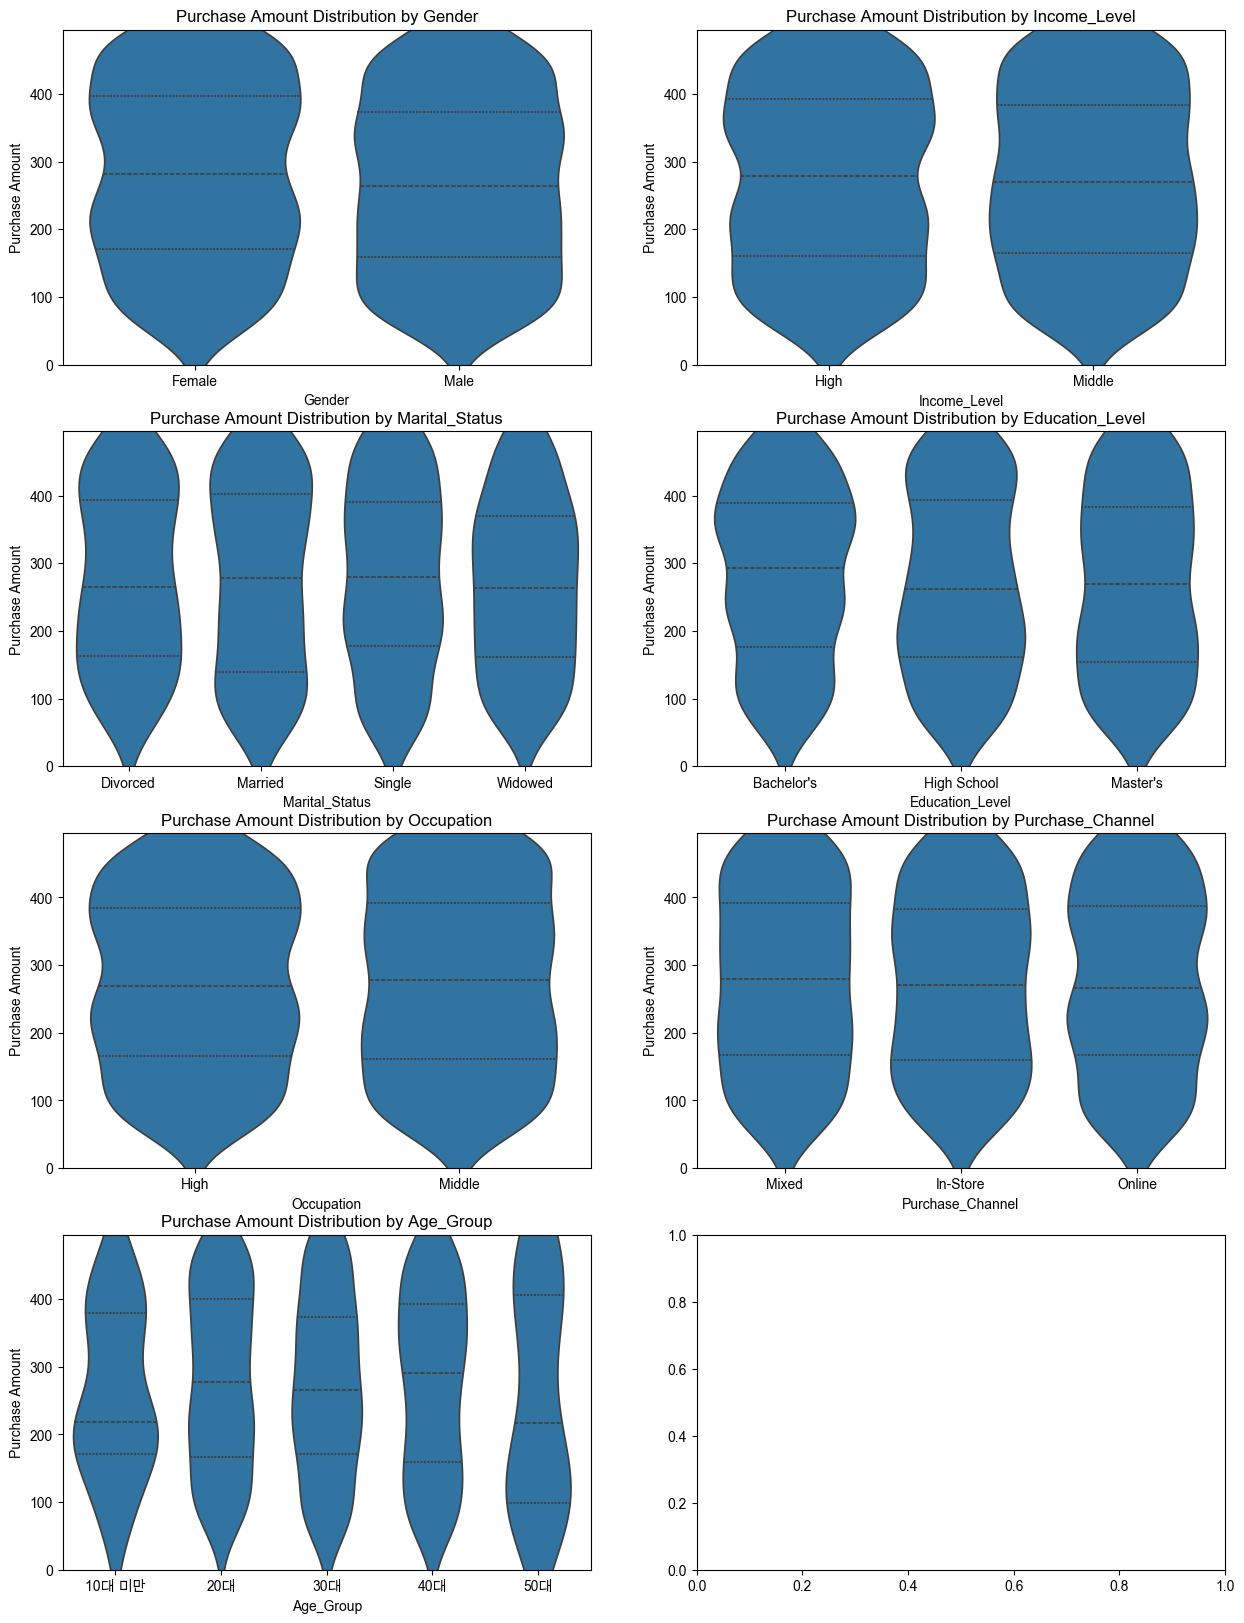

In [213]:
# 서브플롯을 사용하여 하나의 플롯에 여러 그래프 출력
fig, axes = plt.subplots(4, 2, figsize=(15, 20))  # 2x2 서브플롯 생성
columns_to_plot = ['Gender',	'Income_Level',	'Marital_Status'	,'Education_Level',	'Occupation',	'Purchase_Channel','Age_Group']

# 서브플롯에 각 그래프 추가
for ax, col in zip(axes.flat, columns_to_plot):
    # sns.barplot(x=custom_df[col], y=custom_df["Purchase_Amount"], ci=None, ax=ax)
    # ax.set_title(f"Average Purchase Amount by {col}")
    # ax.set_xlabel(col)
    # ax.set_ylabel("Avg Purchase Amount")
    # ax.tick_params(axis='x', rotation=45)  # x축 레이블 가독성 향상

    sns.violinplot(x=custom_df[col], y=custom_df["Purchase_Amount"], inner="quartile", ax=ax)

    ax.set_title(f"Purchase Amount Distribution by {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Purchase Amount")
    ax.set_ylim(0, custom_df["Purchase_Amount"].quantile(0.99))  # 극단 이상치 제외

# 레이아웃 조정
# plt.tight_layout()
plt.show()


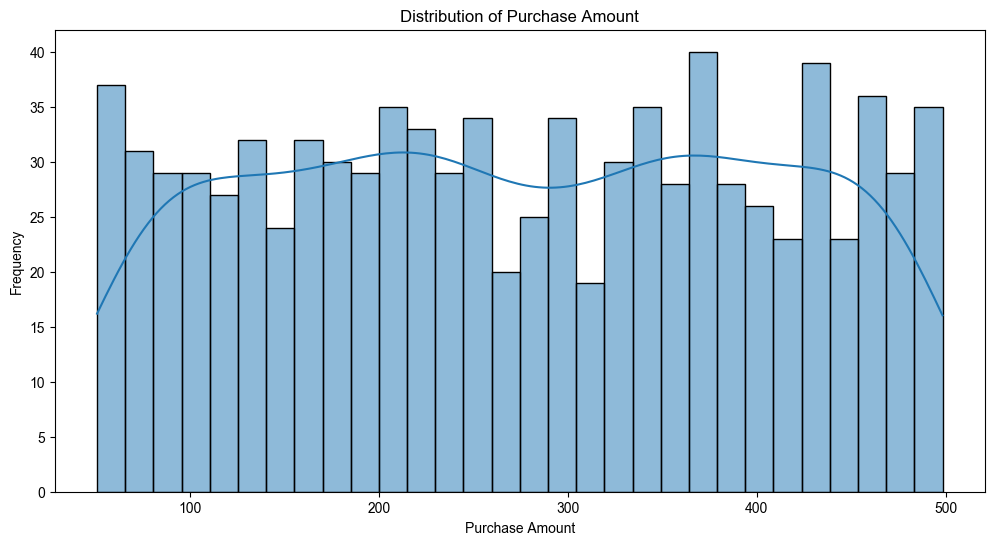

In [214]:
plt.figure(figsize=(12, 6))

# 히스토그램 - 구매 금액의 전체 분포 확인
sns.histplot(custom_df["Purchase_Amount"], bins=30, kde=True)

plt.title("Distribution of Purchase Amount")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")

plt.show()

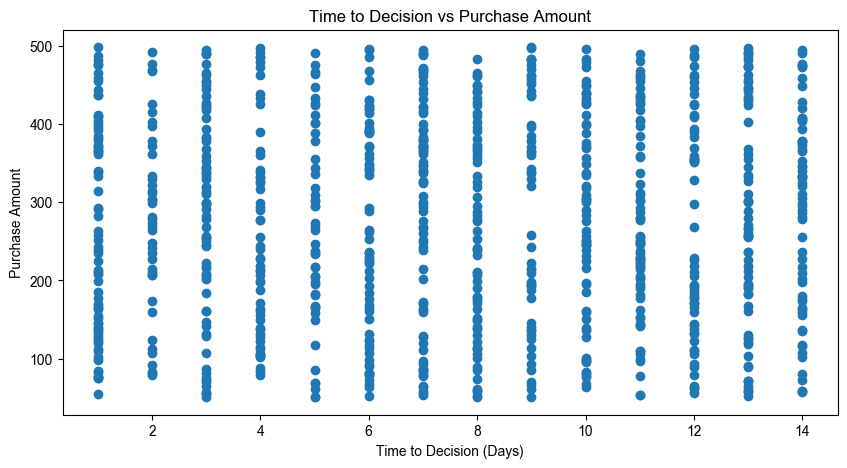

In [215]:
plt.figure(figsize=(10, 5))

# 산점도와 회귀선
plt.scatter(custom_df['Time_to_Decision'], custom_df['Purchase_Amount'])

plt.title("Time to Decision vs Purchase Amount")
plt.xlabel("Time to Decision (Days)")
plt.ylabel("Purchase Amount")
plt.show()


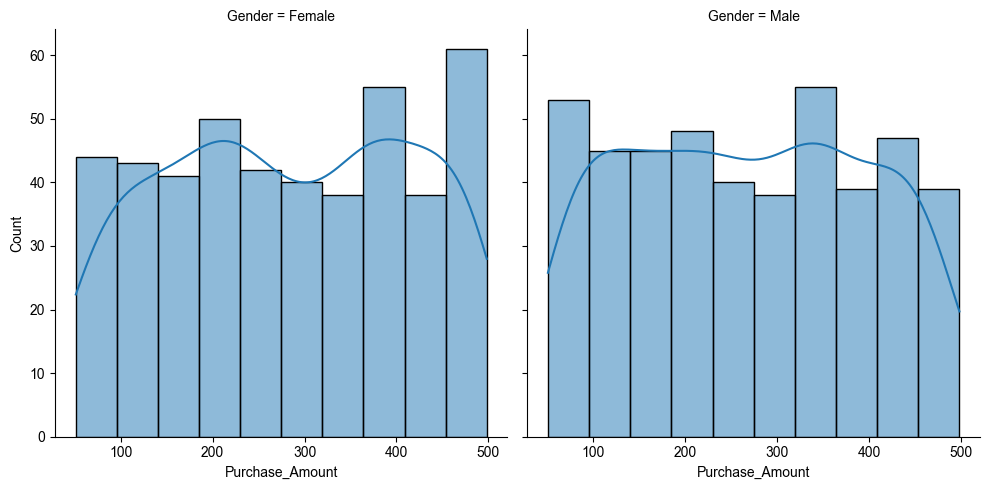

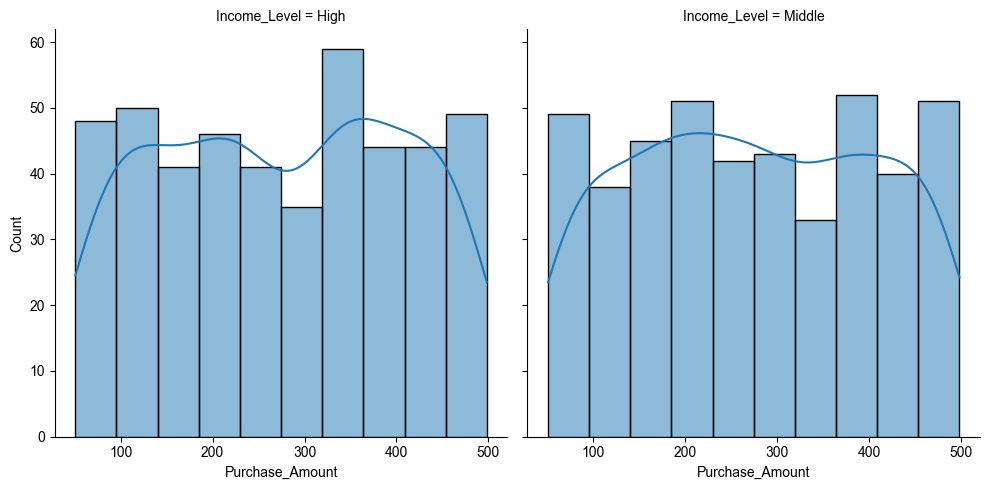

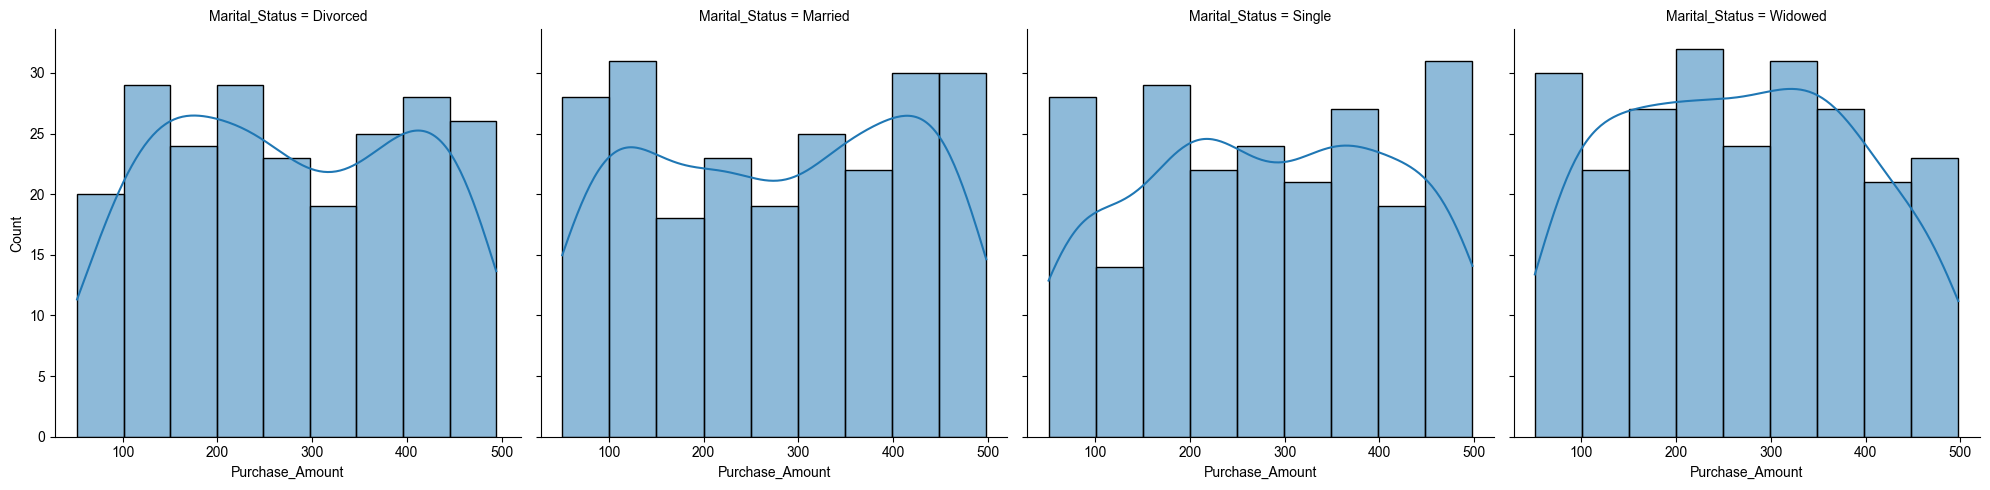

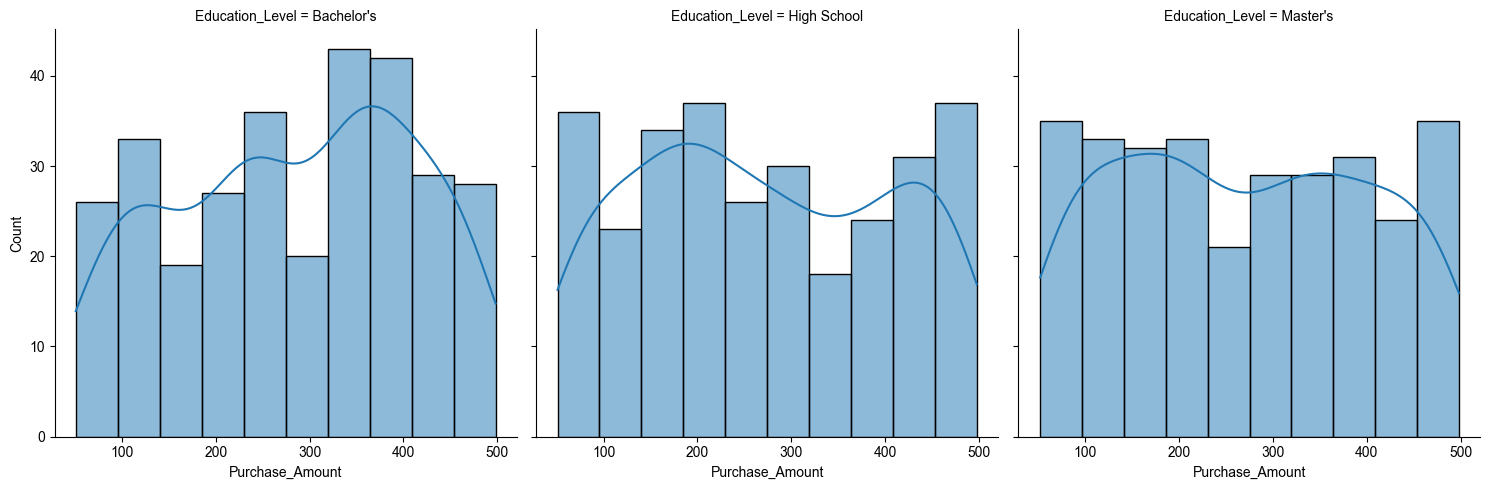

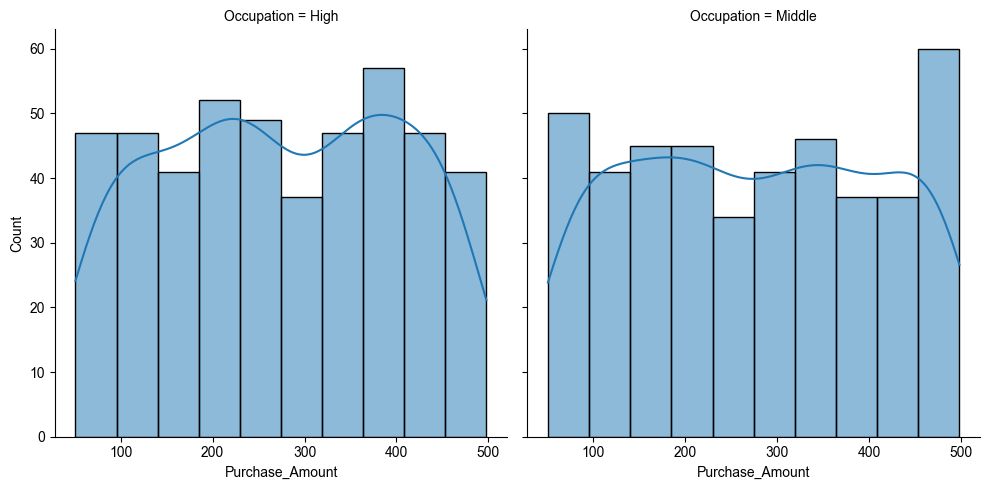

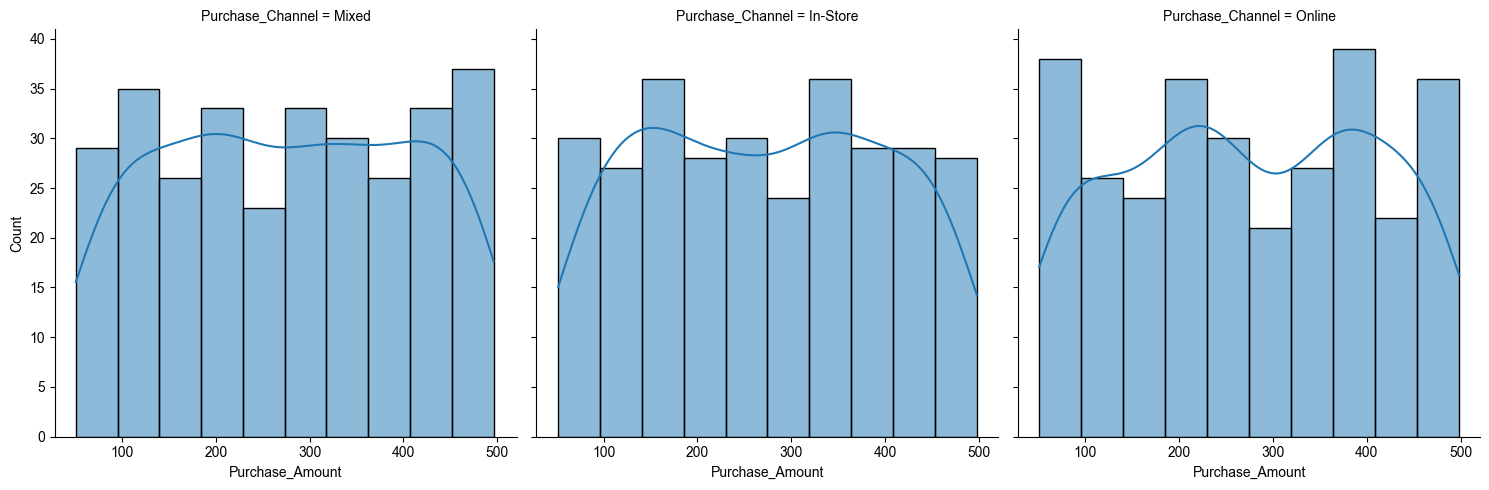

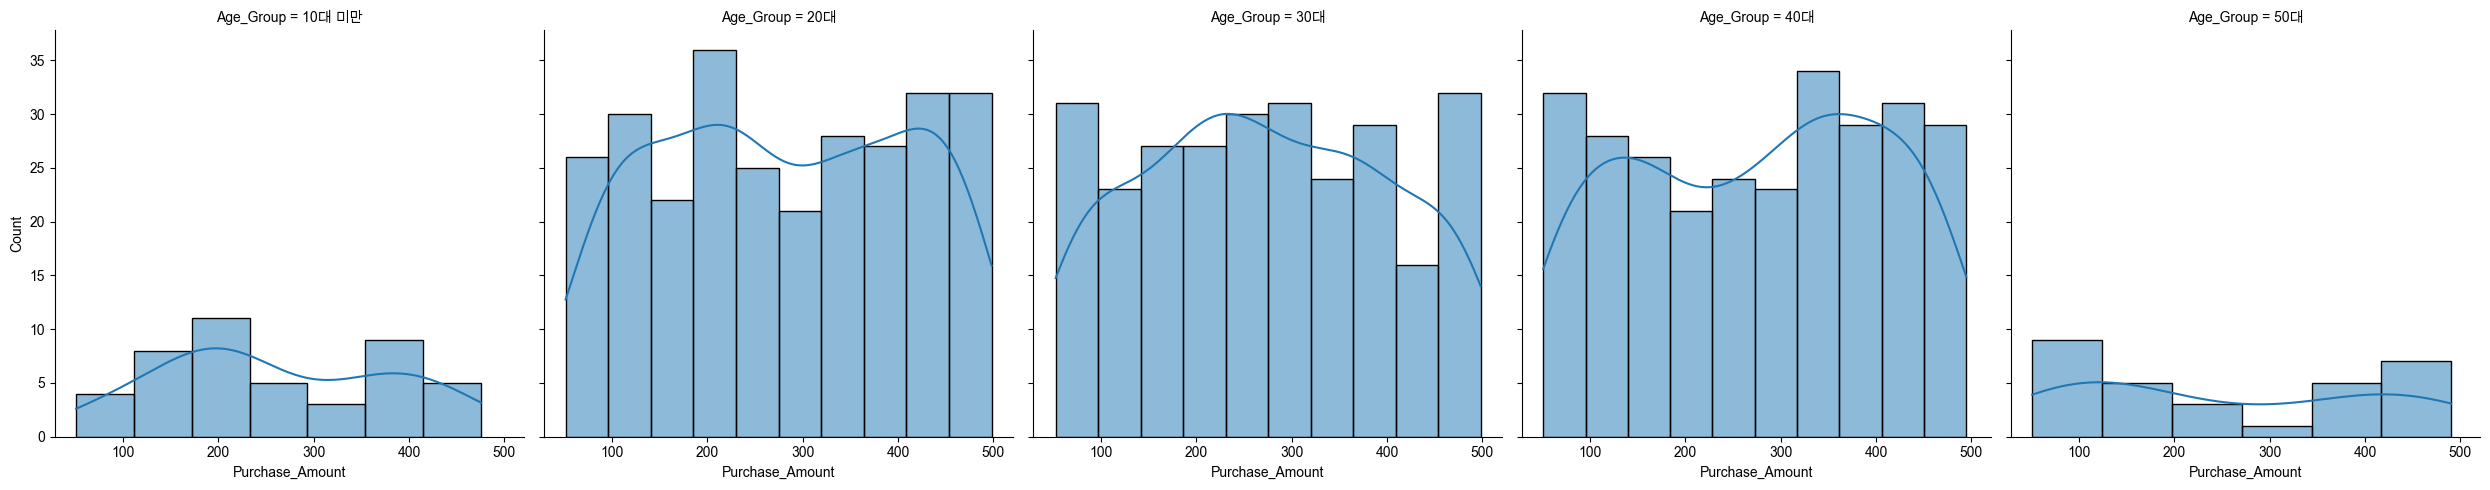

In [216]:
# 서브플롯을 사용하여 하나의 플롯에 여러 그래프 출력
columns_to_plot = ['Gender',	'Income_Level',	'Marital_Status'	,'Education_Level',	'Occupation',	'Purchase_Channel','Age_Group']

# 서브플롯에 각 그래프 추가
for ax, col in zip(axes.flat, columns_to_plot):
    # sns.barplot(x=custom_df[col], y=custom_df["Purchase_Amount"], ci=None, ax=ax)
    # ax.set_title(f"Average Purchase Amount by {col}")
    # ax.set_xlabel(col)
    # ax.set_ylabel("Avg Purchase Amount")
    # ax.tick_params(axis='x', rotation=45)  # x축 레이블 가독성 향상

    g = sns.FacetGrid(custom_df, col=col, height=5)
    g.map_dataframe(sns.histplot, x="Purchase_Amount", kde=True)


# 레이아웃 조정
# plt.tight_layout()
plt.show()


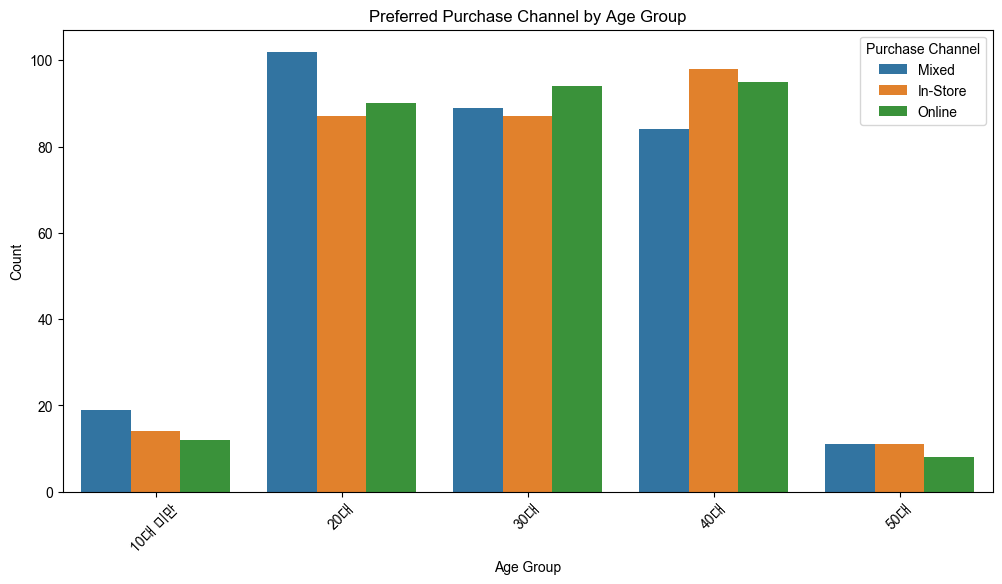

In [217]:
plt.figure(figsize=(12, 6))

sns.countplot(x=custom_df["Age_Group"], hue=custom_df["Purchase_Channel"])

plt.title("Preferred Purchase Channel by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Purchase Channel")
plt.xticks(rotation=45)

plt.show()


In [218]:
custom_df

,Purchase_Amount,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Purchase_Channel,Time_to_Decision,Age_Group
0,333.80,Female,Middle,Married,Bachelor's,Middle,Mixed,2,20대
1,222.22,Male,High,Married,High School,High,In-Store,6,40대
2,426.22,Female,Middle,Single,Master's,High,Mixed,3,20대
3,101.31,Female,Middle,Single,Master's,Middle,Mixed,10,20대
4,211.70,Female,Middle,Widowed,High School,Middle,Mixed,4,30대
...,...,...,...,...,...,...,...,...,...
995,463.67,Female,High,Divorced,Bachelor's,High,Online,5,40대
996,69.78,Female,High,Single,High School,Middle,Mixed,9,50대
997,453.37,Male,High,Married,Bachelor's,High,Mixed,9,20대
998,106.15,Female,High,Widowed,Bachelor's,Middle,In-Store,8,20대


In [219]:
custom_df.to_csv('./data/Ecommerce_Comsumer_Behavior_custom_data.csv', index=False)

In [220]:
df = pd.read_csv('./data/Ecommerce_Comsumer_Behavior_custom_data.csv')
df

,Purchase_Amount,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Purchase_Channel,Time_to_Decision,Age_Group
0,333.80,Female,Middle,Married,Bachelor's,Middle,Mixed,2,20대
1,222.22,Male,High,Married,High School,High,In-Store,6,40대
2,426.22,Female,Middle,Single,Master's,High,Mixed,3,20대
3,101.31,Female,Middle,Single,Master's,Middle,Mixed,10,20대
4,211.70,Female,Middle,Widowed,High School,Middle,Mixed,4,30대
...,...,...,...,...,...,...,...,...,...
896,463.67,Female,High,Divorced,Bachelor's,High,Online,5,40대
897,69.78,Female,High,Single,High School,Middle,Mixed,9,50대
898,453.37,Male,High,Married,Bachelor's,High,Mixed,9,20대
899,106.15,Female,High,Widowed,Bachelor's,Middle,In-Store,8,20대


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Purchase_Amount   901 non-null    float64
 1   Gender            901 non-null    object 
 2   Income_Level      901 non-null    object 
 3   Marital_Status    901 non-null    object 
 4   Education_Level   901 non-null    object 
 5   Occupation        901 non-null    object 
 6   Purchase_Channel  901 non-null    object 
 7   Time_to_Decision  901 non-null    int64  
 8   Age_Group         901 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 63.5+ KB


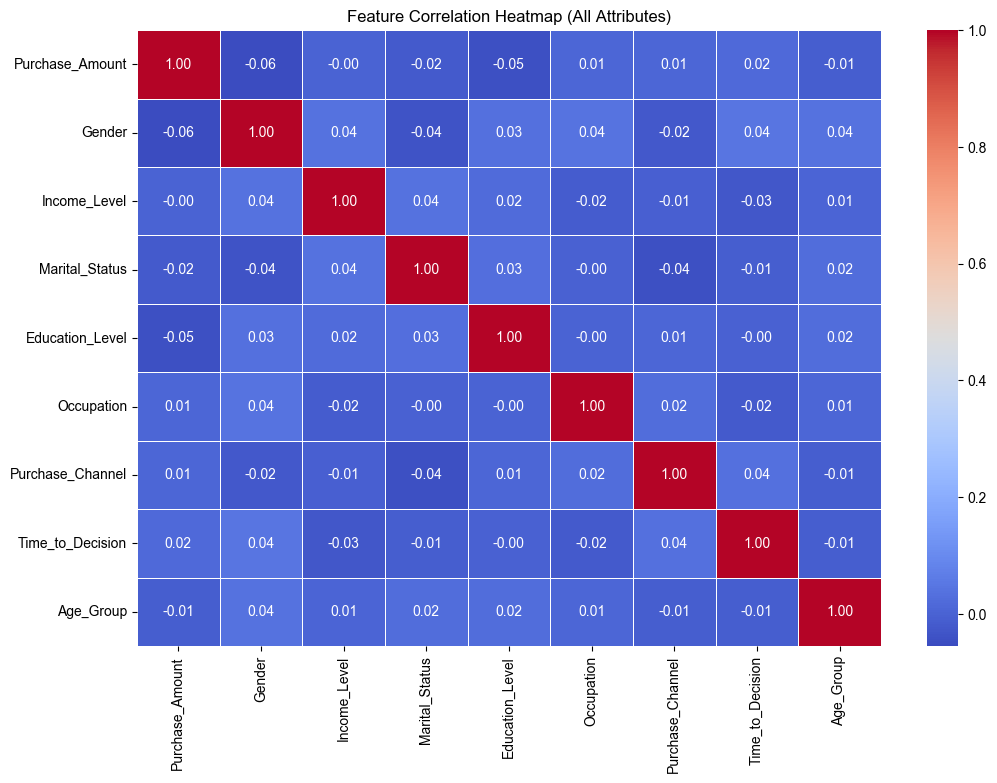

In [222]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 범주형 변수 식별
categorical_columns = df.select_dtypes(include=['object']).columns

# Label Encoding 수행 (범주형 데이터를 숫자로 변환)
df_encoded = df.copy()
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # 나중에 역변환을 위해 저장 가능

# 변환된 데이터의 상관 행렬 계산
correlation_matrix = df_encoded.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# 그래프 제목 설정
plt.title("Feature Correlation Heatmap (All Attributes)")
plt.show()


In [234]:
df_encoded

,Purchase_Amount,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Purchase_Channel,Time_to_Decision,Age_Group
0,333.80,0,1,1,0,1,1,2,1
1,222.22,1,0,1,1,0,0,6,3
2,426.22,0,1,2,2,0,1,3,1
3,101.31,0,1,2,2,1,1,10,1
4,211.70,0,1,3,1,1,1,4,2
...,...,...,...,...,...,...,...,...,...
896,463.67,0,0,0,0,0,2,5,3
897,69.78,0,0,2,1,1,1,9,4
898,453.37,1,0,1,0,0,1,9,1
899,106.15,0,0,3,0,1,0,8,1


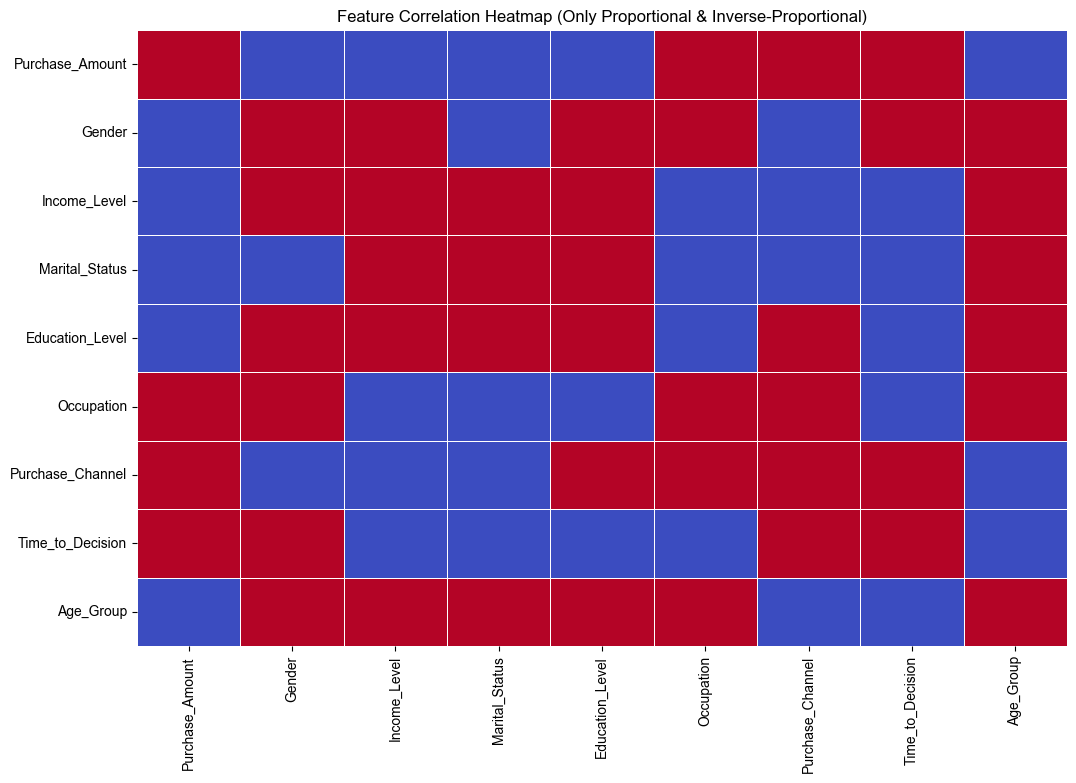

In [223]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# 범주형 변수 식별 및 Label Encoding 수행
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = df.copy()

for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# 상관 행렬 계산
correlation_matrix = df_encoded.corr()

# 비례/반비례 관계만 표현 (0 → 관계 없음, 1 → 비례, -1 → 반비례)
correlation_binary = correlation_matrix.applymap(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

# 히트맵 시각화 (숫자 값 없이 색상으로만 표현)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_binary, cmap="coolwarm", linewidths=0.5, center=0, cbar=False, annot=False)

# 그래프 제목 설정
plt.title("Feature Correlation Heatmap (Only Proportional & Inverse-Proportional)")
plt.show()


---

# 20 ~ 40 대 

In [224]:
# 10대와 50대 데이터를 제외한 데이터프레임 생성
df_filtered = df[~df["Age_Group"].isin(["10대 미만", "50대"])].copy()

# 변경된 데이터 확인
print(df_filtered["Age_Group"].unique())  # Age_Group에 "10s", "50s"가 없는지 확인
print(df_filtered.shape)  # 데이터 크기 확인


['20대' '40대' '30대']
(826, 9)


In [225]:
custom_df = df_filtered

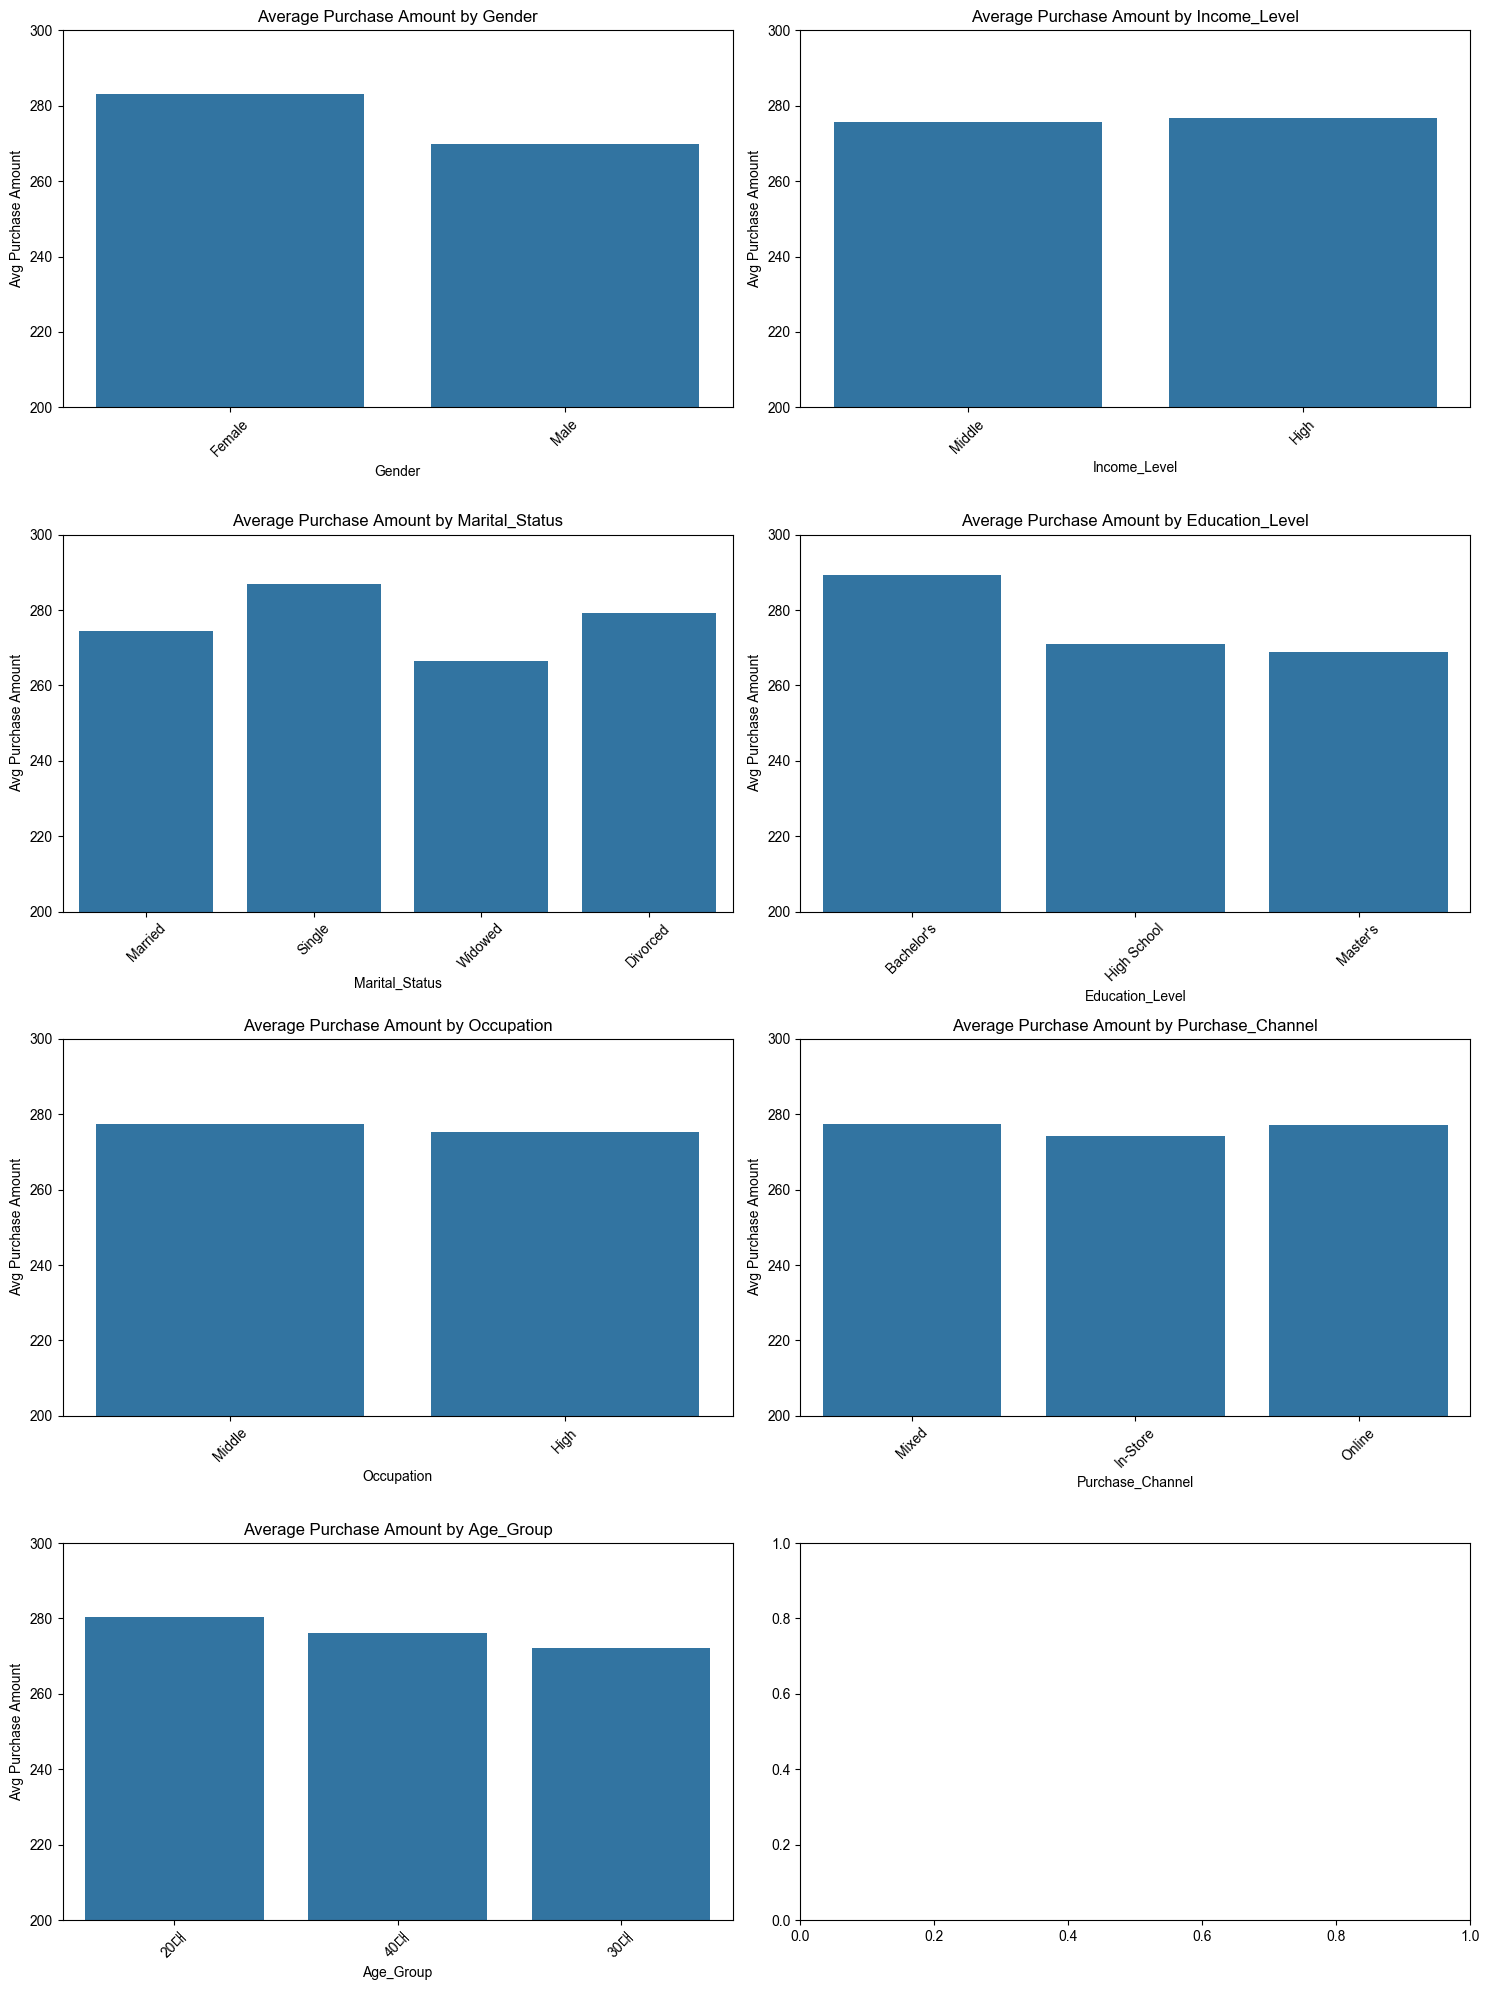

In [226]:
# 서브플롯을 사용하여 하나의 플롯에 여러 그래프 출력
fig, axes = plt.subplots(4, 2, figsize=(15, 20))  # 2x2 서브플롯 생성
columns_to_plot = ['Gender',	'Income_Level',	'Marital_Status'	,'Education_Level',	'Occupation',	'Purchase_Channel','Age_Group']

# 서브플롯에 각 그래프 추가
for ax, col in zip(axes.flat, columns_to_plot):
    sns.barplot(x=custom_df[col], y=custom_df["Purchase_Amount"], ci=None, ax=ax)
    ax.set_title(f"Average Purchase Amount by {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Avg Purchase Amount")
    ax.set_ylim(200, 300)
    ax.tick_params(axis='x', rotation=45)  # x축 레이블 가독성 향상

# 레이아웃 조정
plt.tight_layout()
plt.show()


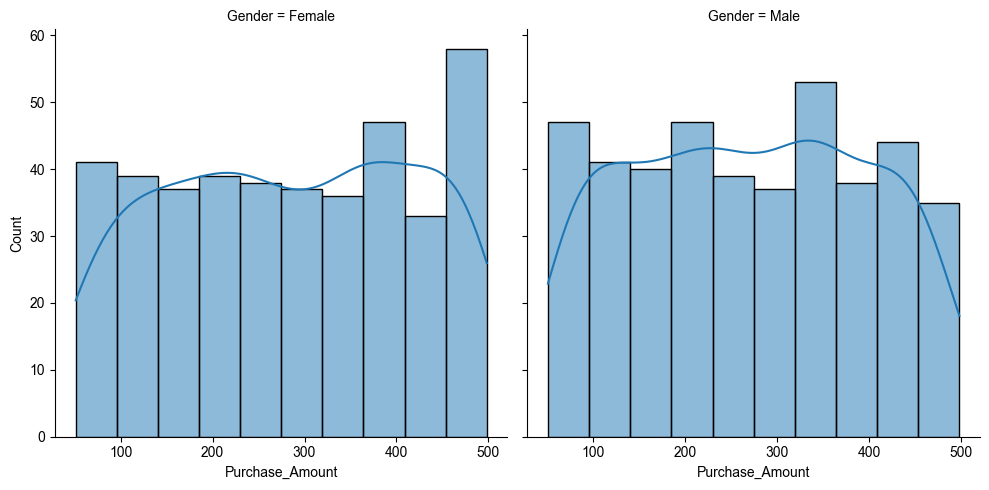

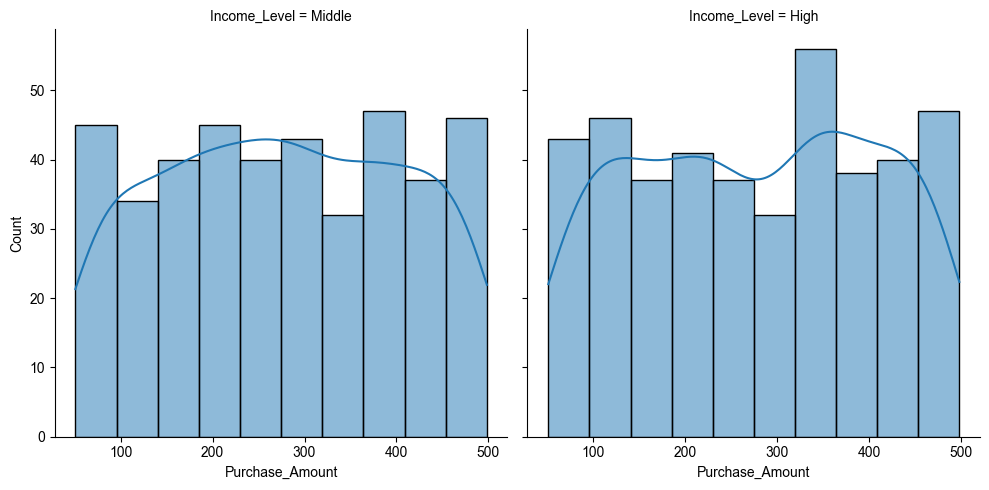

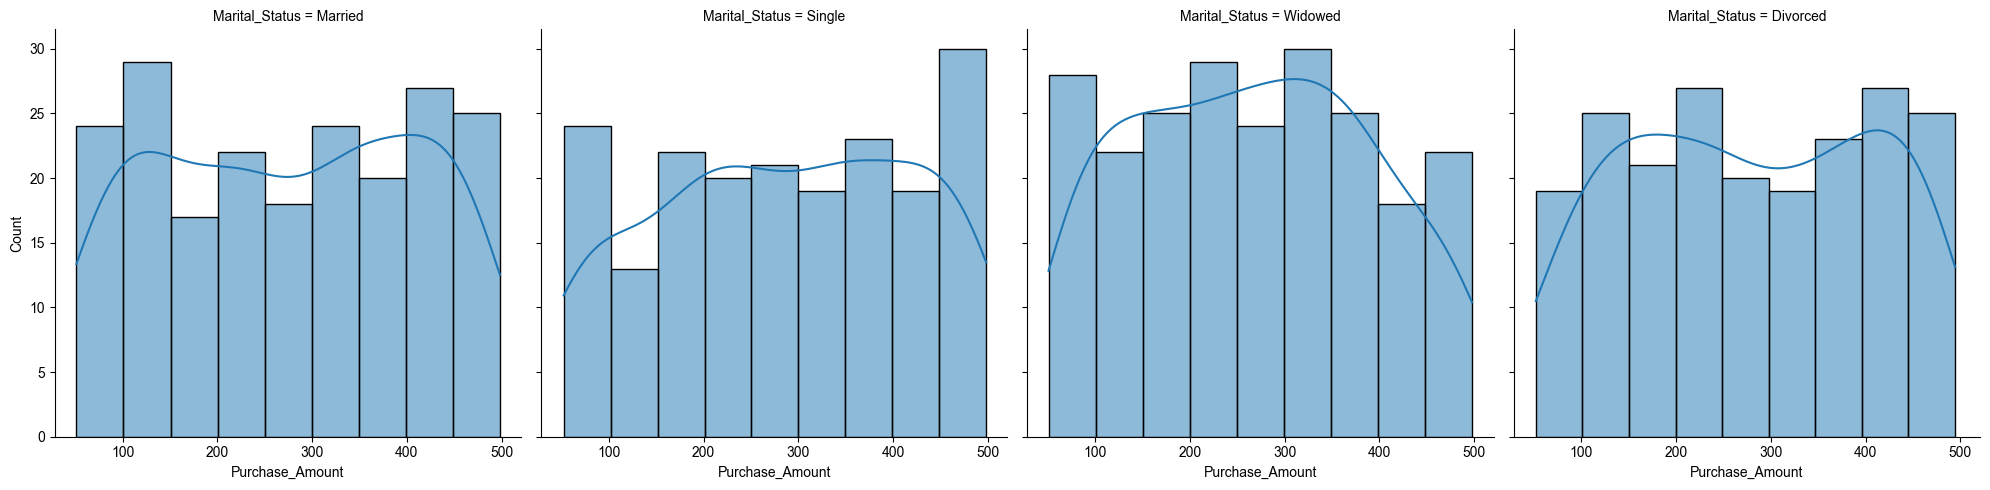

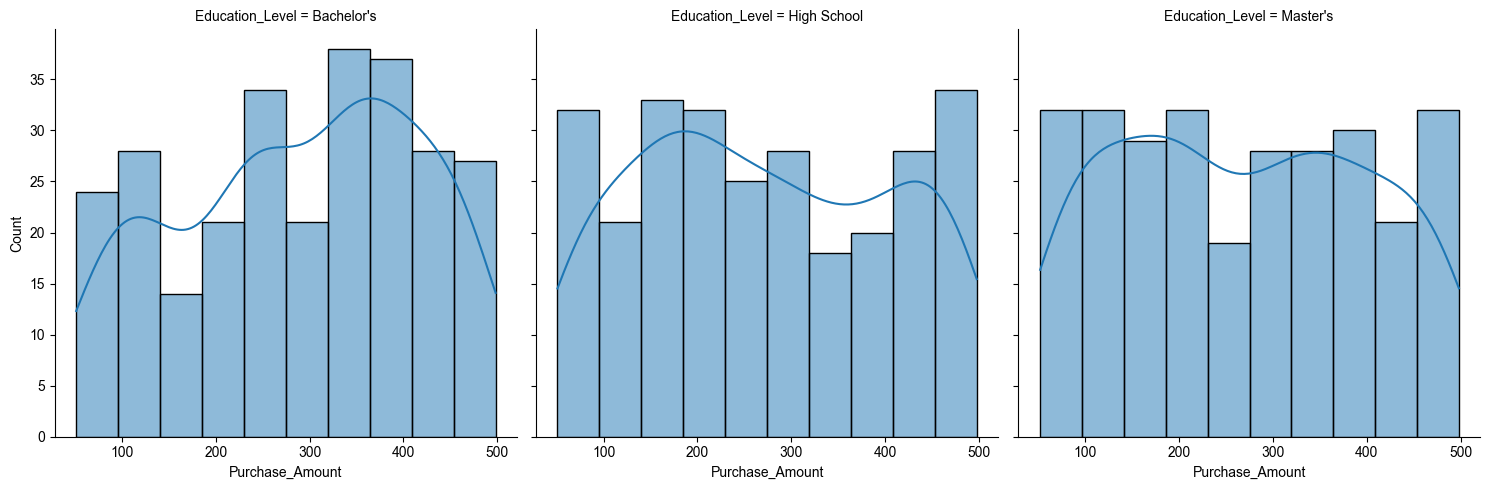

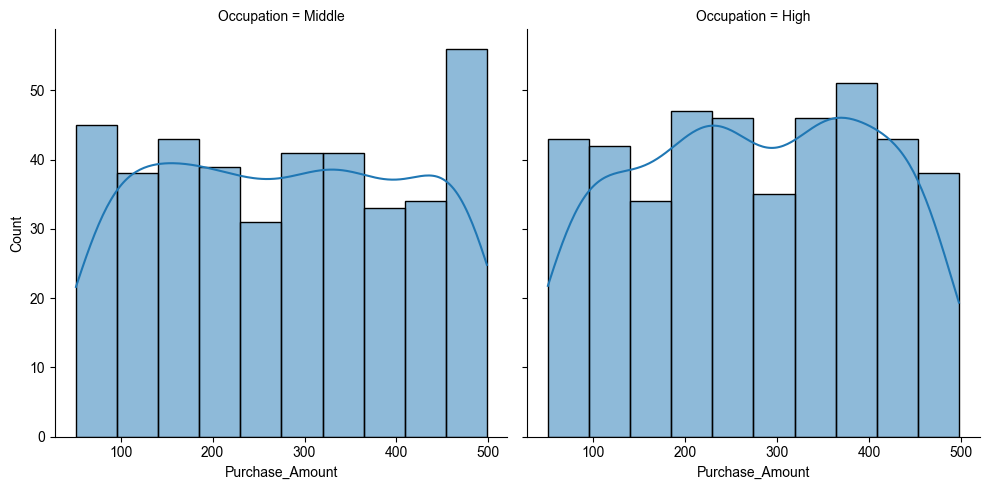

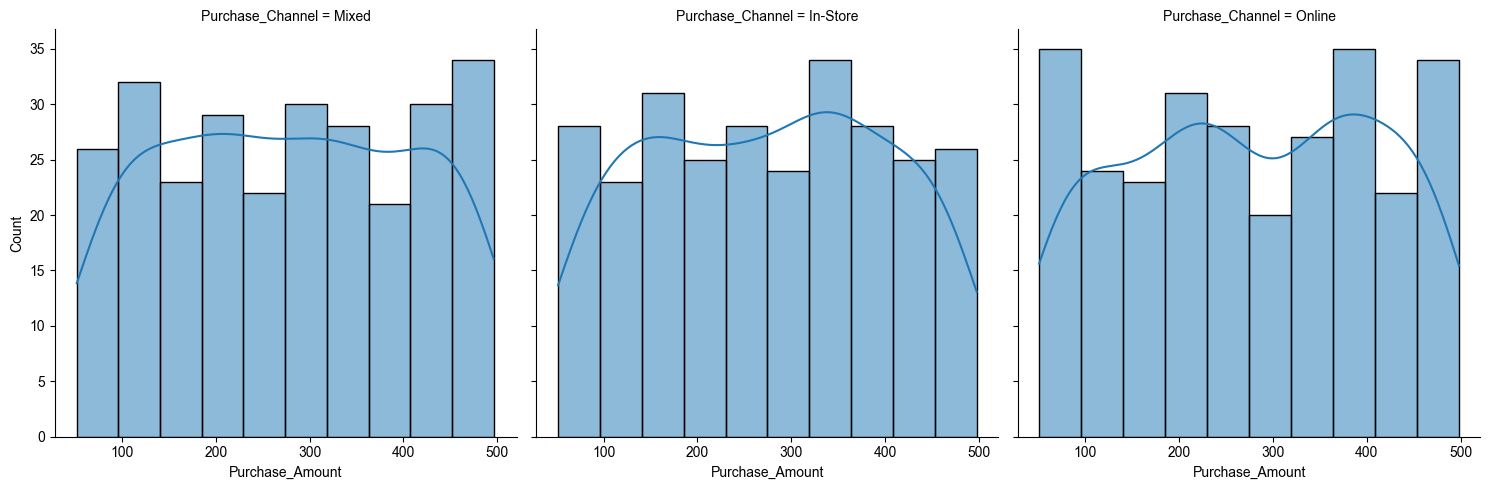

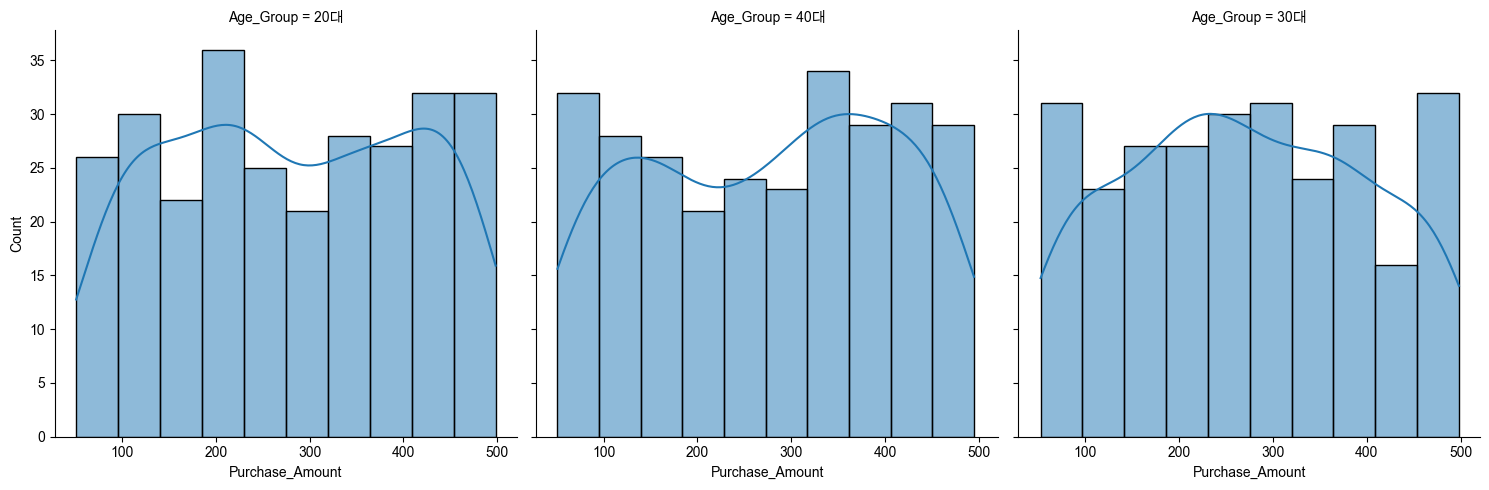

In [227]:
# 서브플롯을 사용하여 하나의 플롯에 여러 그래프 출력
columns_to_plot = ['Gender',	'Income_Level',	'Marital_Status'	,'Education_Level',	'Occupation',	'Purchase_Channel','Age_Group']

# 서브플롯에 각 그래프 추가
for ax, col in zip(axes.flat, columns_to_plot):
    # sns.barplot(x=custom_df[col], y=custom_df["Purchase_Amount"], ci=None, ax=ax)
    # ax.set_title(f"Average Purchase Amount by {col}")
    # ax.set_xlabel(col)
    # ax.set_ylabel("Avg Purchase Amount")
    # ax.tick_params(axis='x', rotation=45)  # x축 레이블 가독성 향상

    g = sns.FacetGrid(custom_df, col=col, height=5)
    g.map_dataframe(sns.histplot, x="Purchase_Amount", kde=True)


# 레이아웃 조정
# plt.tight_layout()
plt.show()


---

# 20 ~ 30

In [228]:
# 10대와 50대 데이터를 제외한 데이터프레임 생성
df_filtered = df[~df["Age_Group"].isin(["10대 미만", "50대", "40대"])].copy()

# 변경된 데이터 확인
print(df_filtered["Age_Group"].unique())  # Age_Group에 "10s", "50s"가 없는지 확인
print(df_filtered.shape)  # 데이터 크기 확인
print(df_filtered['Age_Group'].value_counts())


['20대' '30대']
(549, 9)
Age_Group
20대    279
30대    270
Name: count, dtype: int64


In [229]:
custom_df = df_filtered

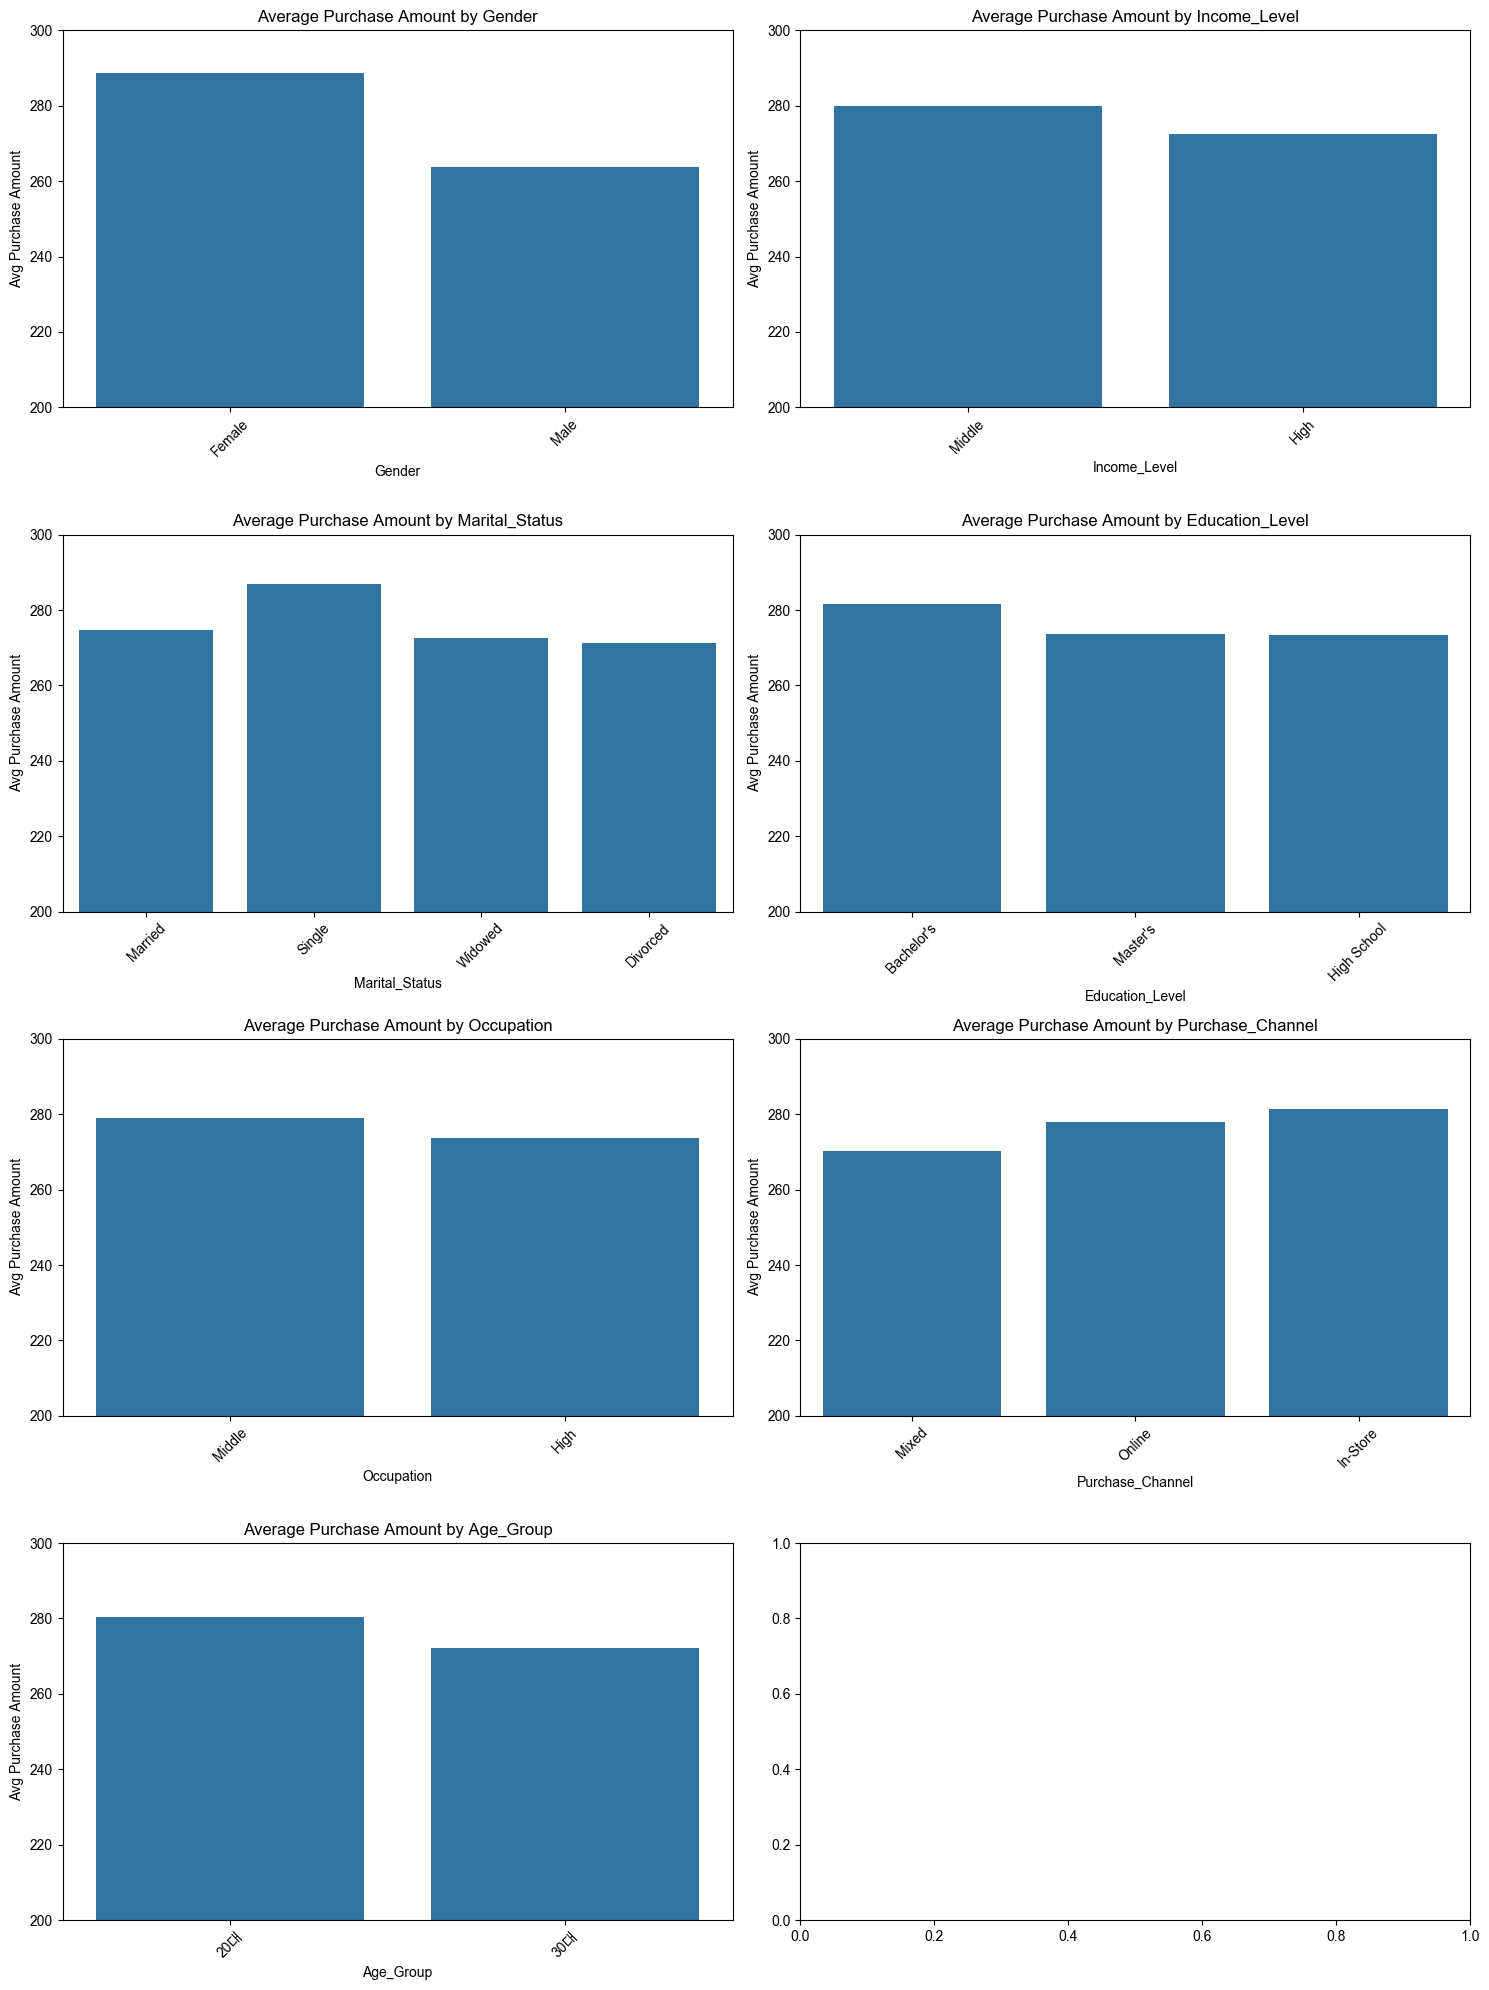

In [230]:
# 서브플롯을 사용하여 하나의 플롯에 여러 그래프 출력
fig, axes = plt.subplots(4, 2, figsize=(15, 20))  # 2x2 서브플롯 생성
columns_to_plot = ['Gender',	'Income_Level',	'Marital_Status'	,'Education_Level',	'Occupation',	'Purchase_Channel','Age_Group']

# 서브플롯에 각 그래프 추가
for ax, col in zip(axes.flat, columns_to_plot):
    sns.barplot(x=custom_df[col], y=custom_df["Purchase_Amount"], ci=None, ax=ax)
    ax.set_title(f"Average Purchase Amount by {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Avg Purchase Amount")
    ax.set_ylim(200, 300)
    ax.tick_params(axis='x', rotation=45)  # x축 레이블 가독성 향상

# 레이아웃 조정
plt.tight_layout()
plt.show()


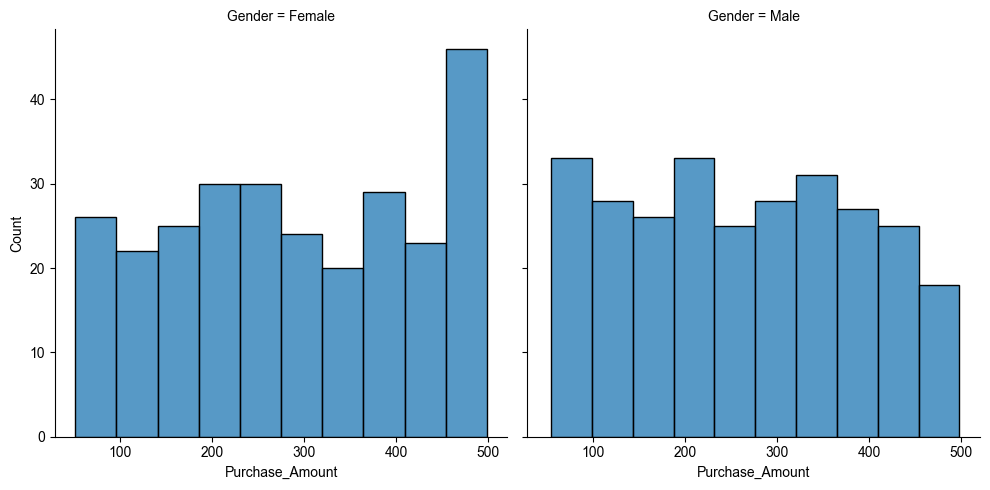

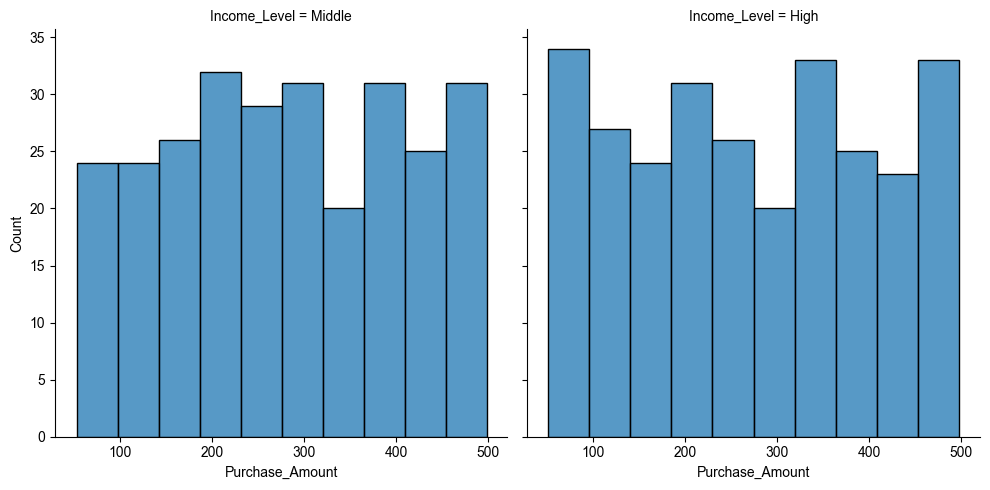

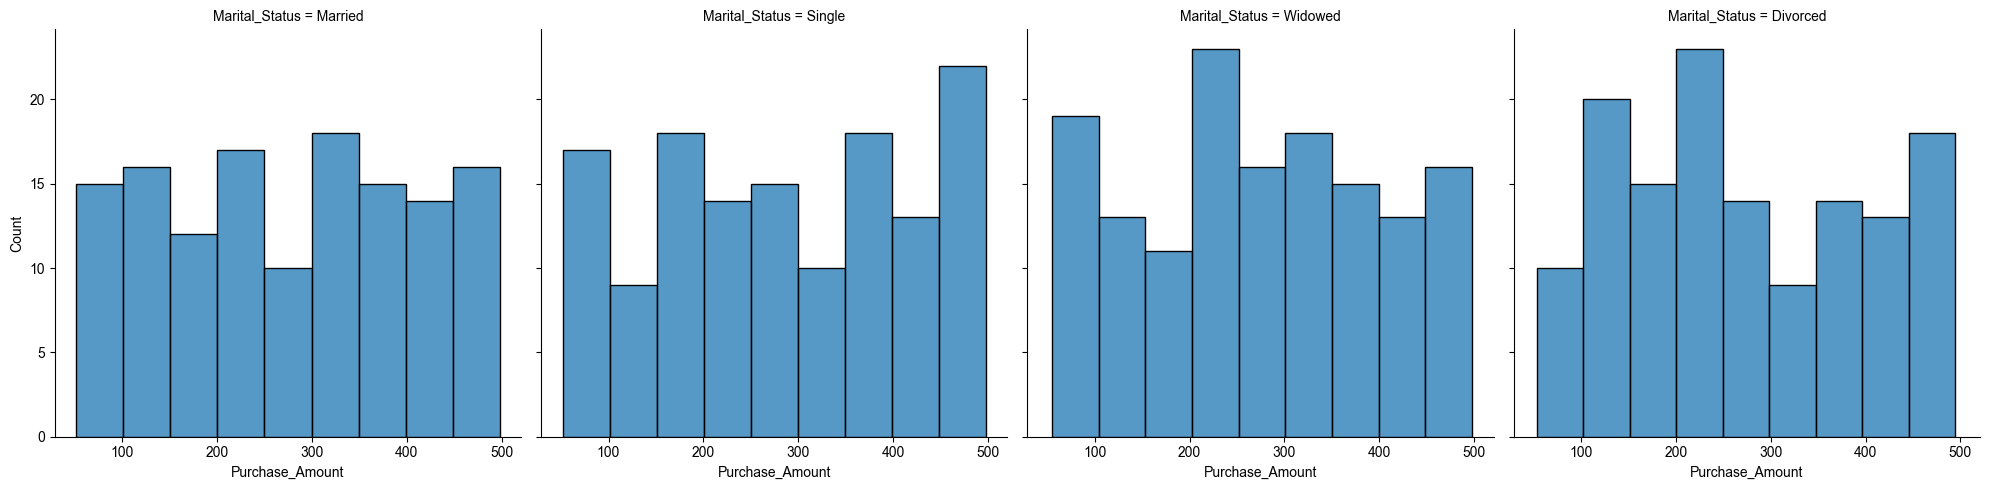

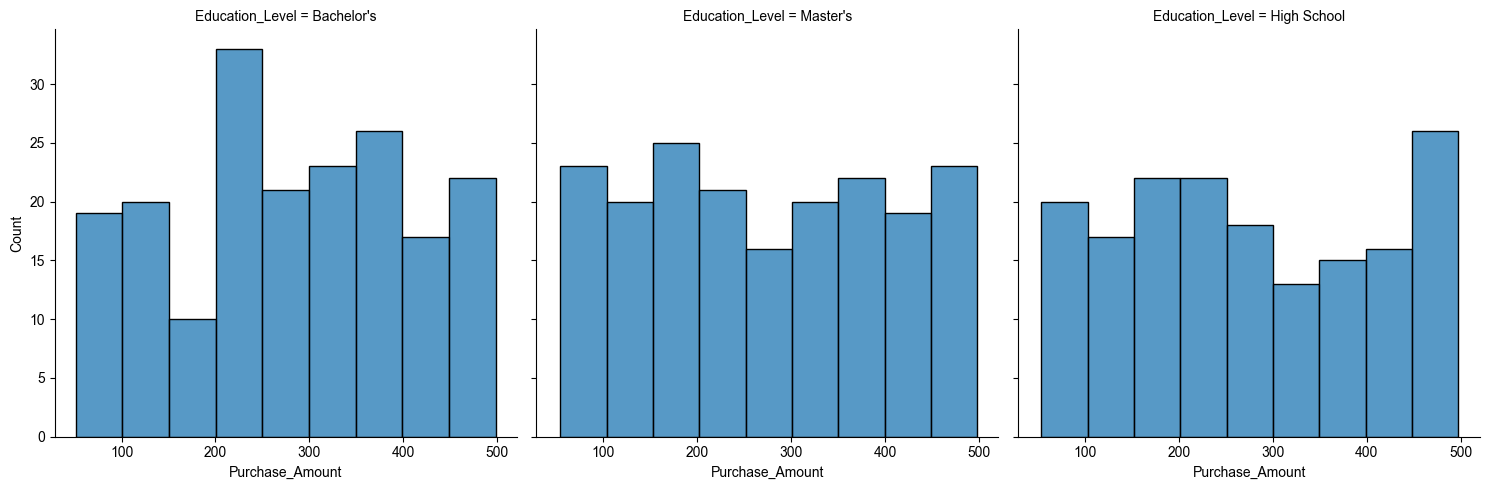

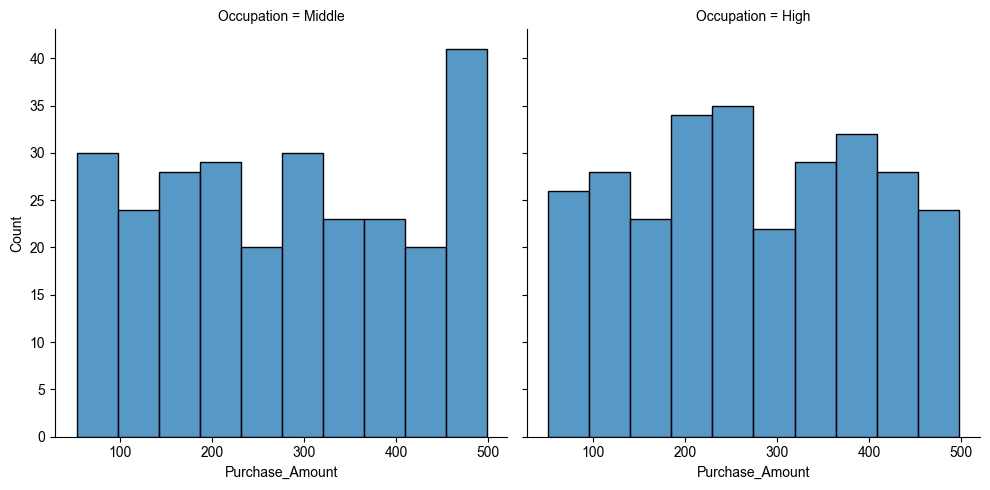

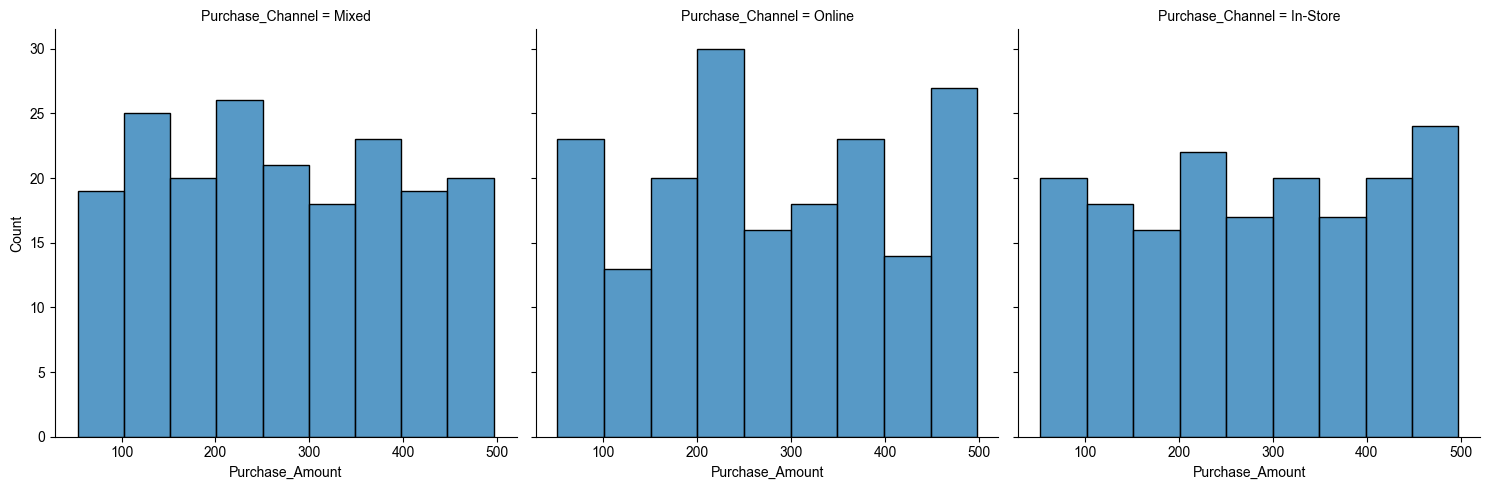

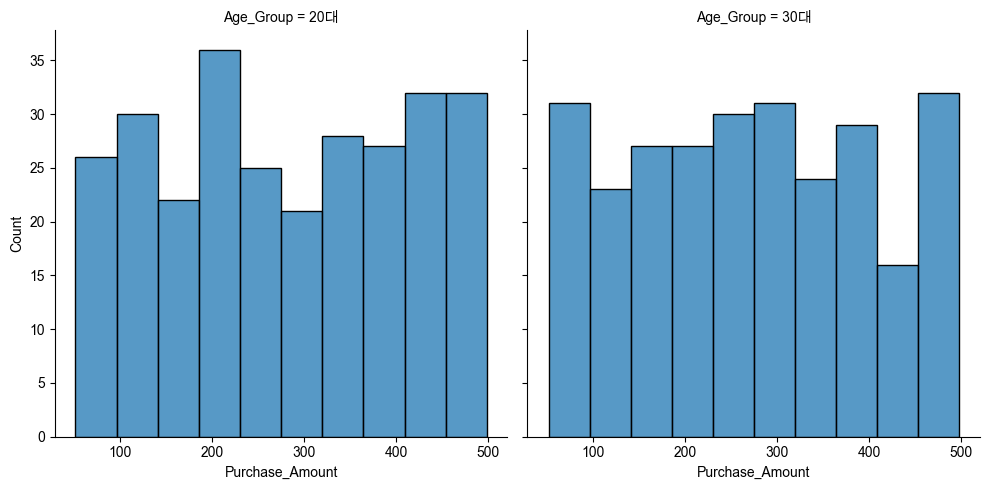

In [231]:
# 서브플롯을 사용하여 하나의 플롯에 여러 그래프 출력
columns_to_plot = ['Gender',	'Income_Level',	'Marital_Status'	,'Education_Level',	'Occupation',	'Purchase_Channel','Age_Group']

# 서브플롯에 각 그래프 추가
for ax, col in zip(axes.flat, columns_to_plot):
    # sns.barplot(x=custom_df[col], y=custom_df["Purchase_Amount"], ci=None, ax=ax)
    # ax.set_title(f"Average Purchase Amount by {col}")
    # ax.set_xlabel(col)
    # ax.set_ylabel("Avg Purchase Amount")
    # ax.tick_params(axis='x', rotation=45)  # x축 레이블 가독성 향상

    g = sns.FacetGrid(custom_df, col=col, height=5)
    g.map_dataframe(sns.histplot, x="Purchase_Amount", kde=False)


# 레이아웃 조정
# plt.tight_layout()
plt.show()


---

## 컬럼별 비교

In [232]:
# 결혼상태 - 구매 방식
# 성별 - 나이대
# 결혼 상태 - 소득 

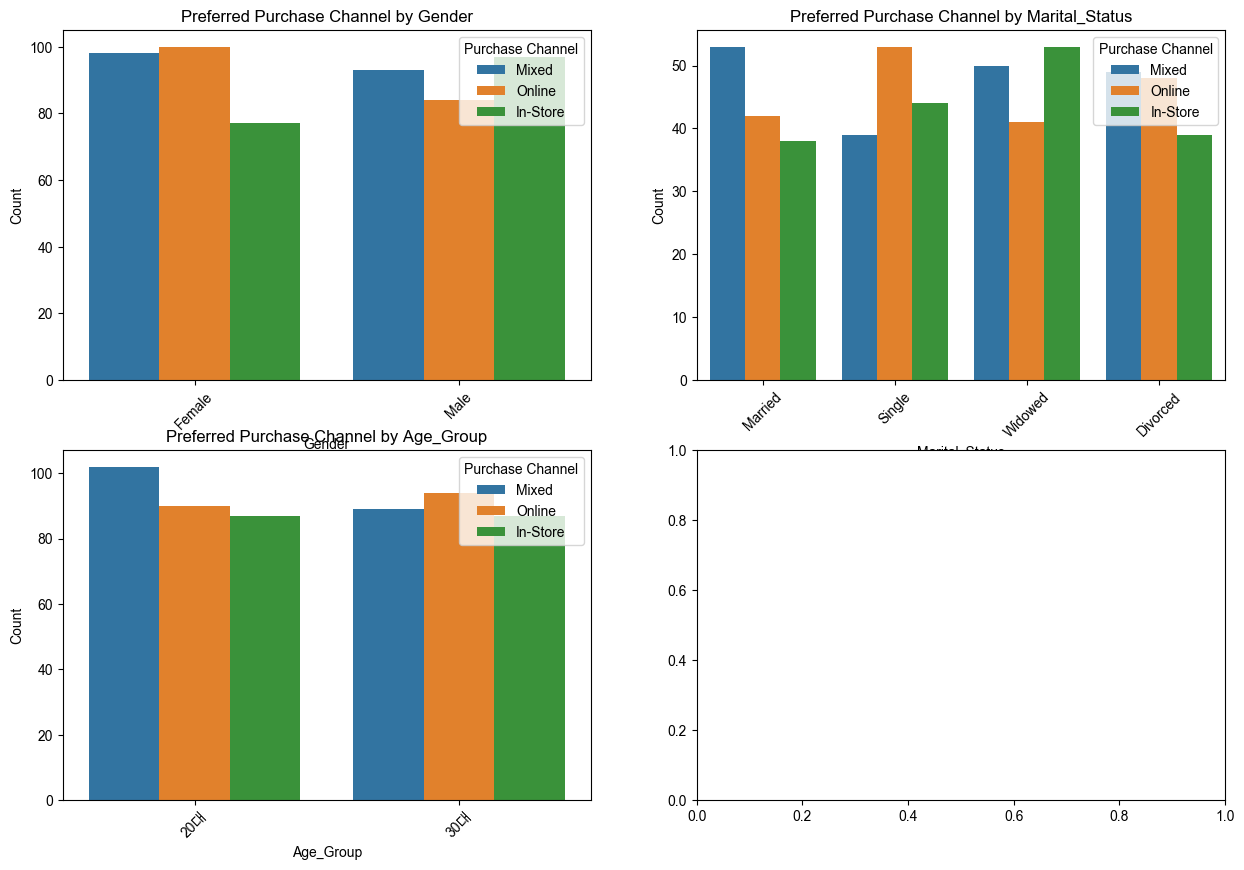

In [233]:
# 서브플롯을 사용하여 하나의 플롯에 여러 그래프 출력
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 서브플롯 생성
# columns_to_plot = ['Gender',	'Income_Level',	'Marital_Status'	,'Education_Level',	'Occupation',	'Purchase_Channel','Age_Group']
columns_to_plot = ['Gender',	'Marital_Status','Age_Group']

# 서브플롯에 각 그래프 추가
for ax, col in zip(axes.flat, columns_to_plot):
    # sns.barplot(x=custom_df[col], y=custom_df["Purchase_Amount"], ci=None, ax=ax)
    # ax.set_title(f"Average Purchase Amount by {col}")
    # ax.set_xlabel(col)
    # ax.set_ylabel("Avg Purchase Amount")
    # ax.set_ylim(200, 300)
    # ax.tick_params(axis='x', rotation=45)  # x축 레이블 가독성 향상

    sns.countplot(x=custom_df[col], hue=custom_df["Purchase_Channel"], ax=ax)

    ax.set_title(f"Preferred Purchase Channel by {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.legend(title="Purchase Channel")
    ax.tick_params(axis='x', rotation=45)  # x축 레이블 가독성 향상

# 레이아웃 조정
plt.show()
